In [118]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import FormatStrFormatter
import matplotlib.gridspec as gridspec

from gwbird import pls
from gwbird.overlap import Response
from gwbird.nell import AngularResponse, Sensitivity_ell
from gwbird import nell

import seaborn as sns

%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.family'] = 'serif'


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Example file for LIGO

* Response (Overlap Reduction function)

Calculating Overlaps LIGO H - LIGO L
- tensor modes
- vector modes
- scalar modes
- V


Text(0.5, 1.0, 'LIGO Overlap Reduction Function')

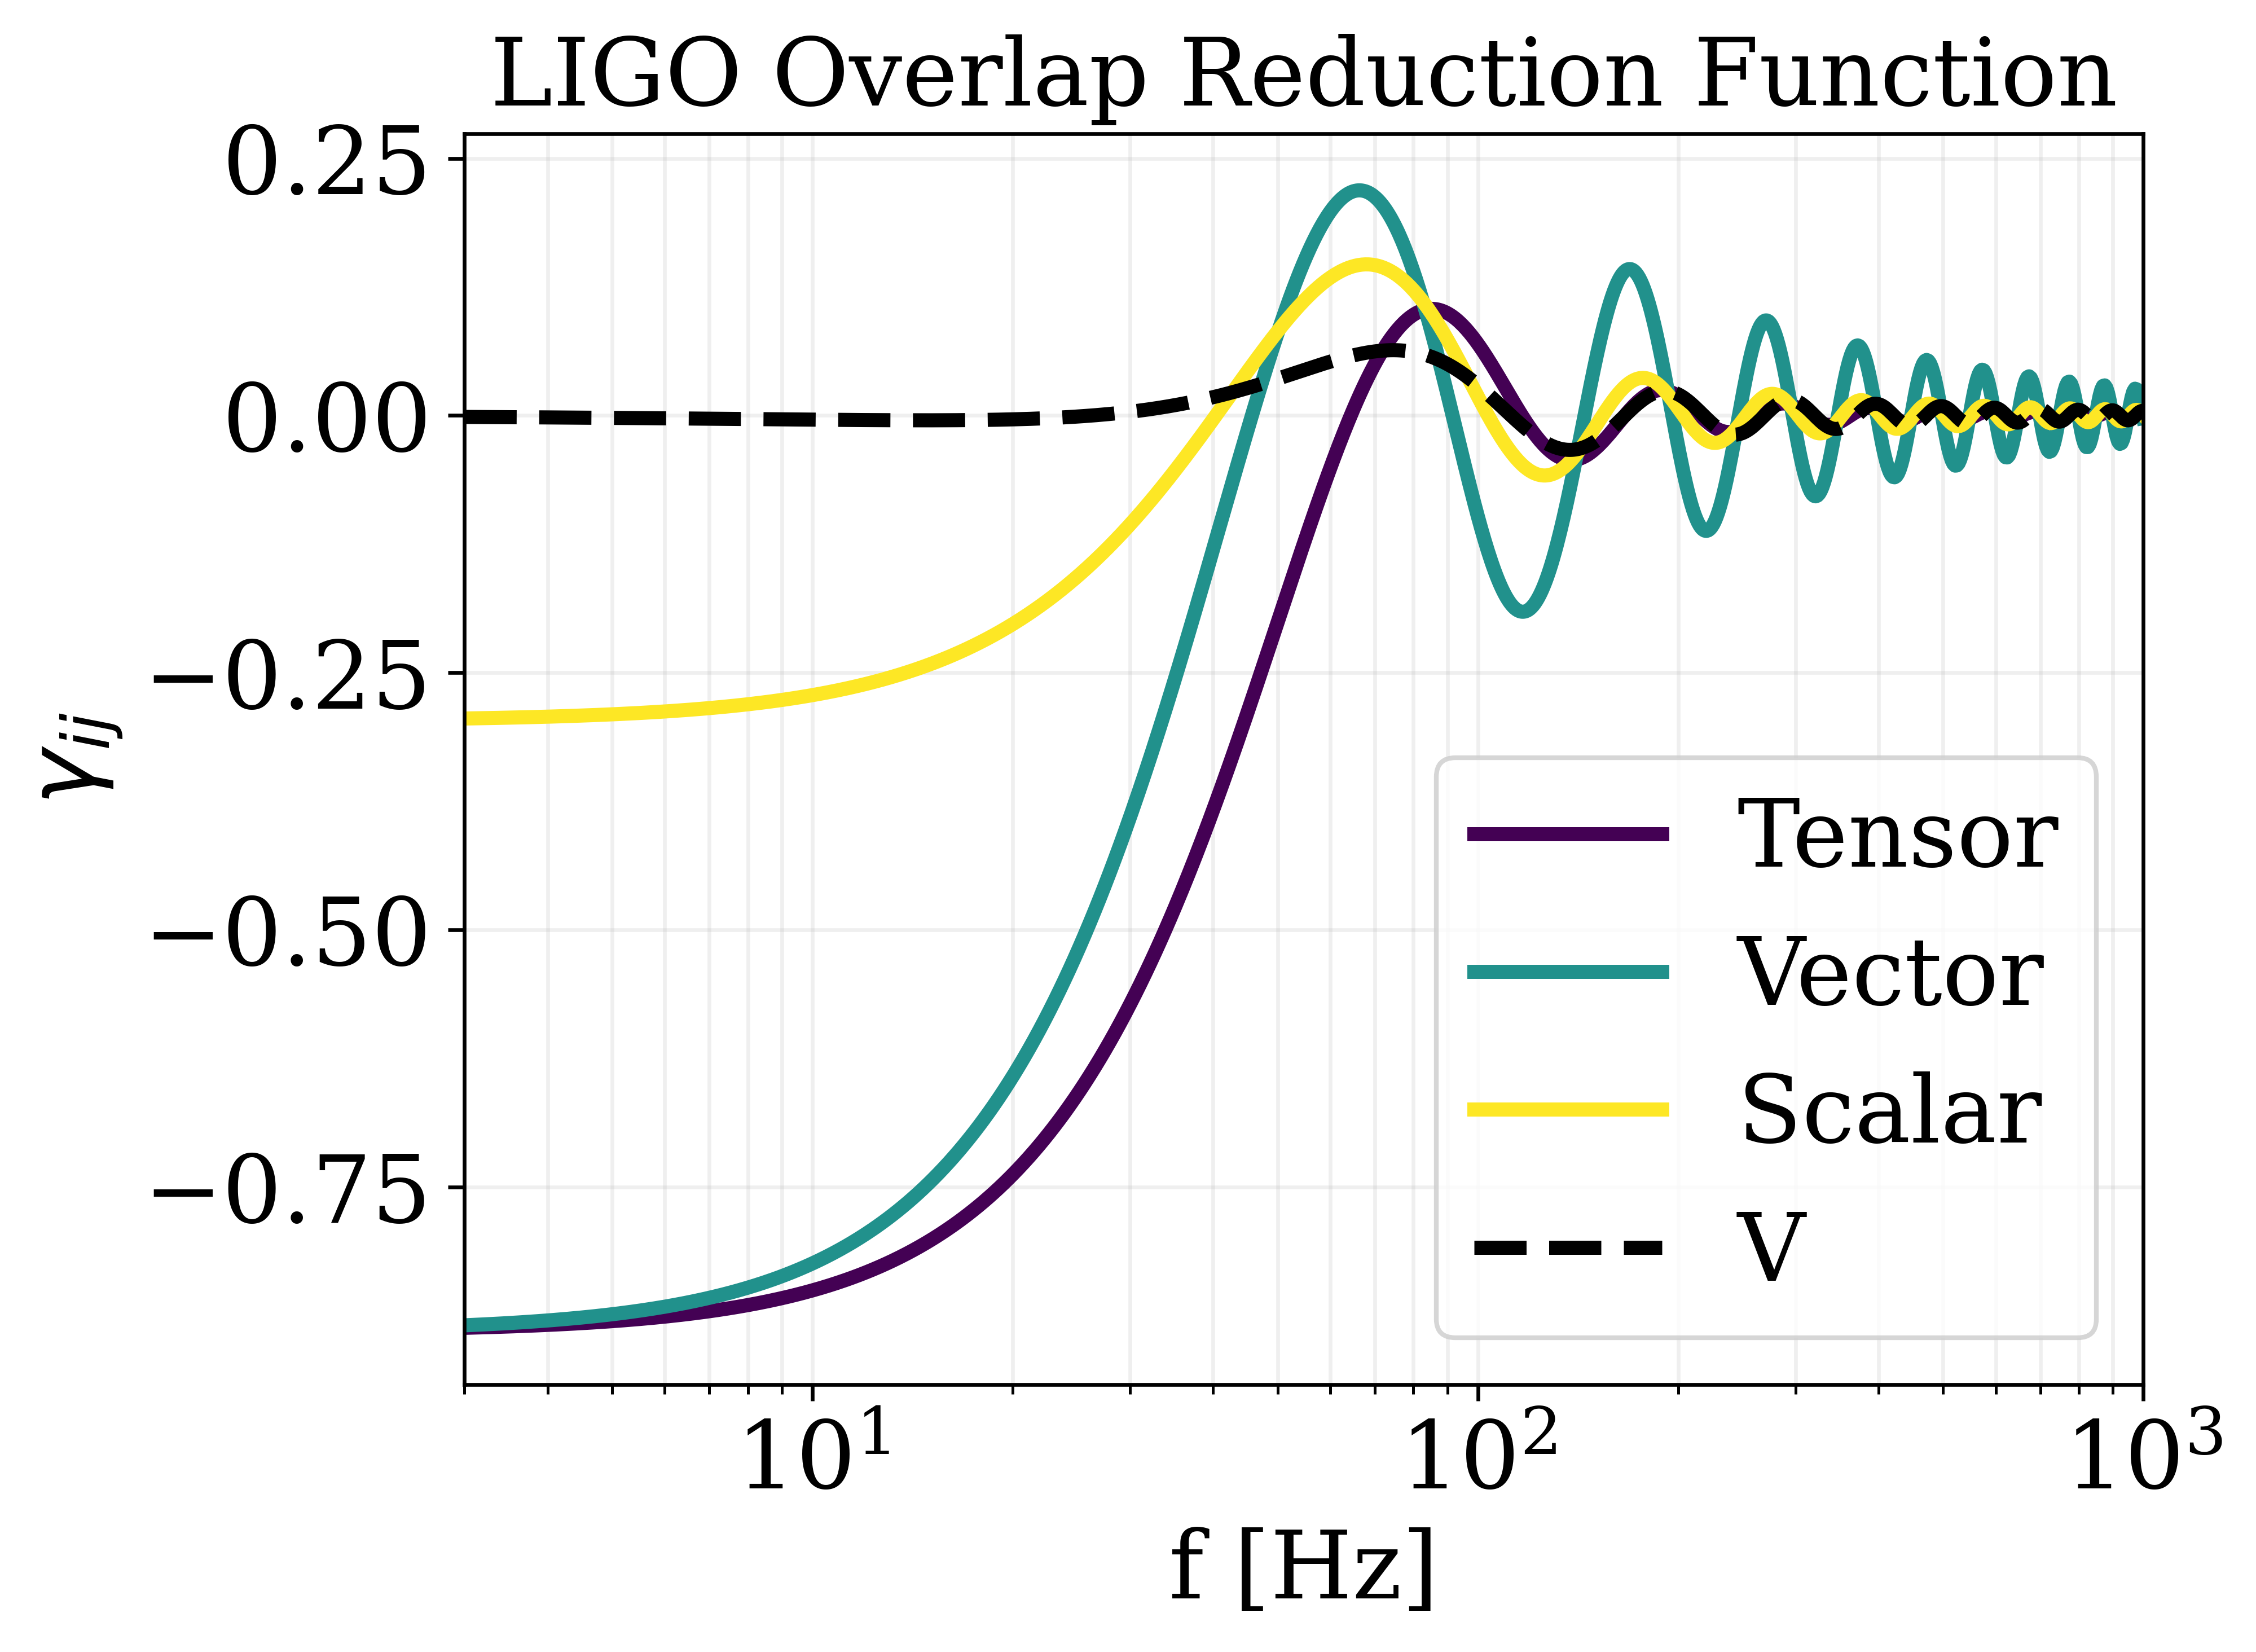

In [134]:
f = np.logspace(np.log10(3), np.log10(1000), 1000)

print('Calculating Overlaps LIGO H - LIGO L')
print('- tensor modes')
R_t = Response.overlap('LIGO H', 'LIGO L', f, 0, 't', None)
print('- vector modes')
R_v = Response.overlap('LIGO H', 'LIGO L', f, 0, 'v', None)
print('- scalar modes')
R_s = Response.overlap('LIGO H', 'LIGO L', f, 0, 's', None)
print('- V')
R_V = Response.overlap('LIGO H', 'LIGO L', f, 0, 'V', None)


colors = cm.viridis(np.linspace(0, 1, 3))
plt.plot(f, R_t, label='Tensor', color = colors[0], rasterized=True) 
plt.plot(f, R_v, label='Vector', color = colors[1], rasterized=True)
plt.plot(f, R_s, label='Scalar', color = colors[2], rasterized=True)
plt.plot(f, R_V, label='V', color = 'k', linestyle='--', rasterized=True)
plt.xscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$\gamma_{ij}$')
plt.grid(alpha=0.2, which='both')
plt.xlim(3, 1000)
#plt.ylim(-0.2, 0.2)
plt.legend()
plt.title('LIGO Overlap Reduction Function')

In [120]:
print(R_t)

[-8.86928442e-01 -8.86885770e-01 -8.86842600e-01 -8.86798926e-01
 -8.86754744e-01 -8.86710045e-01 -8.86664826e-01 -8.86619079e-01
 -8.86572799e-01 -8.86525979e-01 -8.86478613e-01 -8.86430695e-01
 -8.86382218e-01 -8.86333176e-01 -8.86283562e-01 -8.86233369e-01
 -8.86182592e-01 -8.86131222e-01 -8.86079254e-01 -8.86026680e-01
 -8.85973492e-01 -8.85919685e-01 -8.85865251e-01 -8.85810183e-01
 -8.85754472e-01 -8.85698113e-01 -8.85641096e-01 -8.85583416e-01
 -8.85525063e-01 -8.85466030e-01 -8.85406309e-01 -8.85345892e-01
 -8.85284772e-01 -8.85222940e-01 -8.85160387e-01 -8.85097106e-01
 -8.85033087e-01 -8.84968323e-01 -8.84902805e-01 -8.84836523e-01
 -8.84769470e-01 -8.84701635e-01 -8.84633011e-01 -8.84563588e-01
 -8.84493357e-01 -8.84422308e-01 -8.84350431e-01 -8.84277718e-01
 -8.84204159e-01 -8.84129743e-01 -8.84054461e-01 -8.83978303e-01
 -8.83901259e-01 -8.83823318e-01 -8.83744470e-01 -8.83664705e-01
 -8.83584011e-01 -8.83502379e-01 -8.83419797e-01 -8.83336255e-01
 -8.83251741e-01 -8.83166

In [121]:
print(R_s[0]/ R_t[0])

0.33214226536545405


* Power Law Integrated Sensitivity Curve

Min pls_t: 3.242619946649391e-10 f min: 24.195875677632408
Min pls_v: 4.173707449369712e-10 f min: 22.046257617413627
Min pls_s: 1.3201123323231028e-09 f min: 23.09607127777356
Min pls_V: 8.728325025076337e-09 f min: 56.882117397059574


(3, 1000)

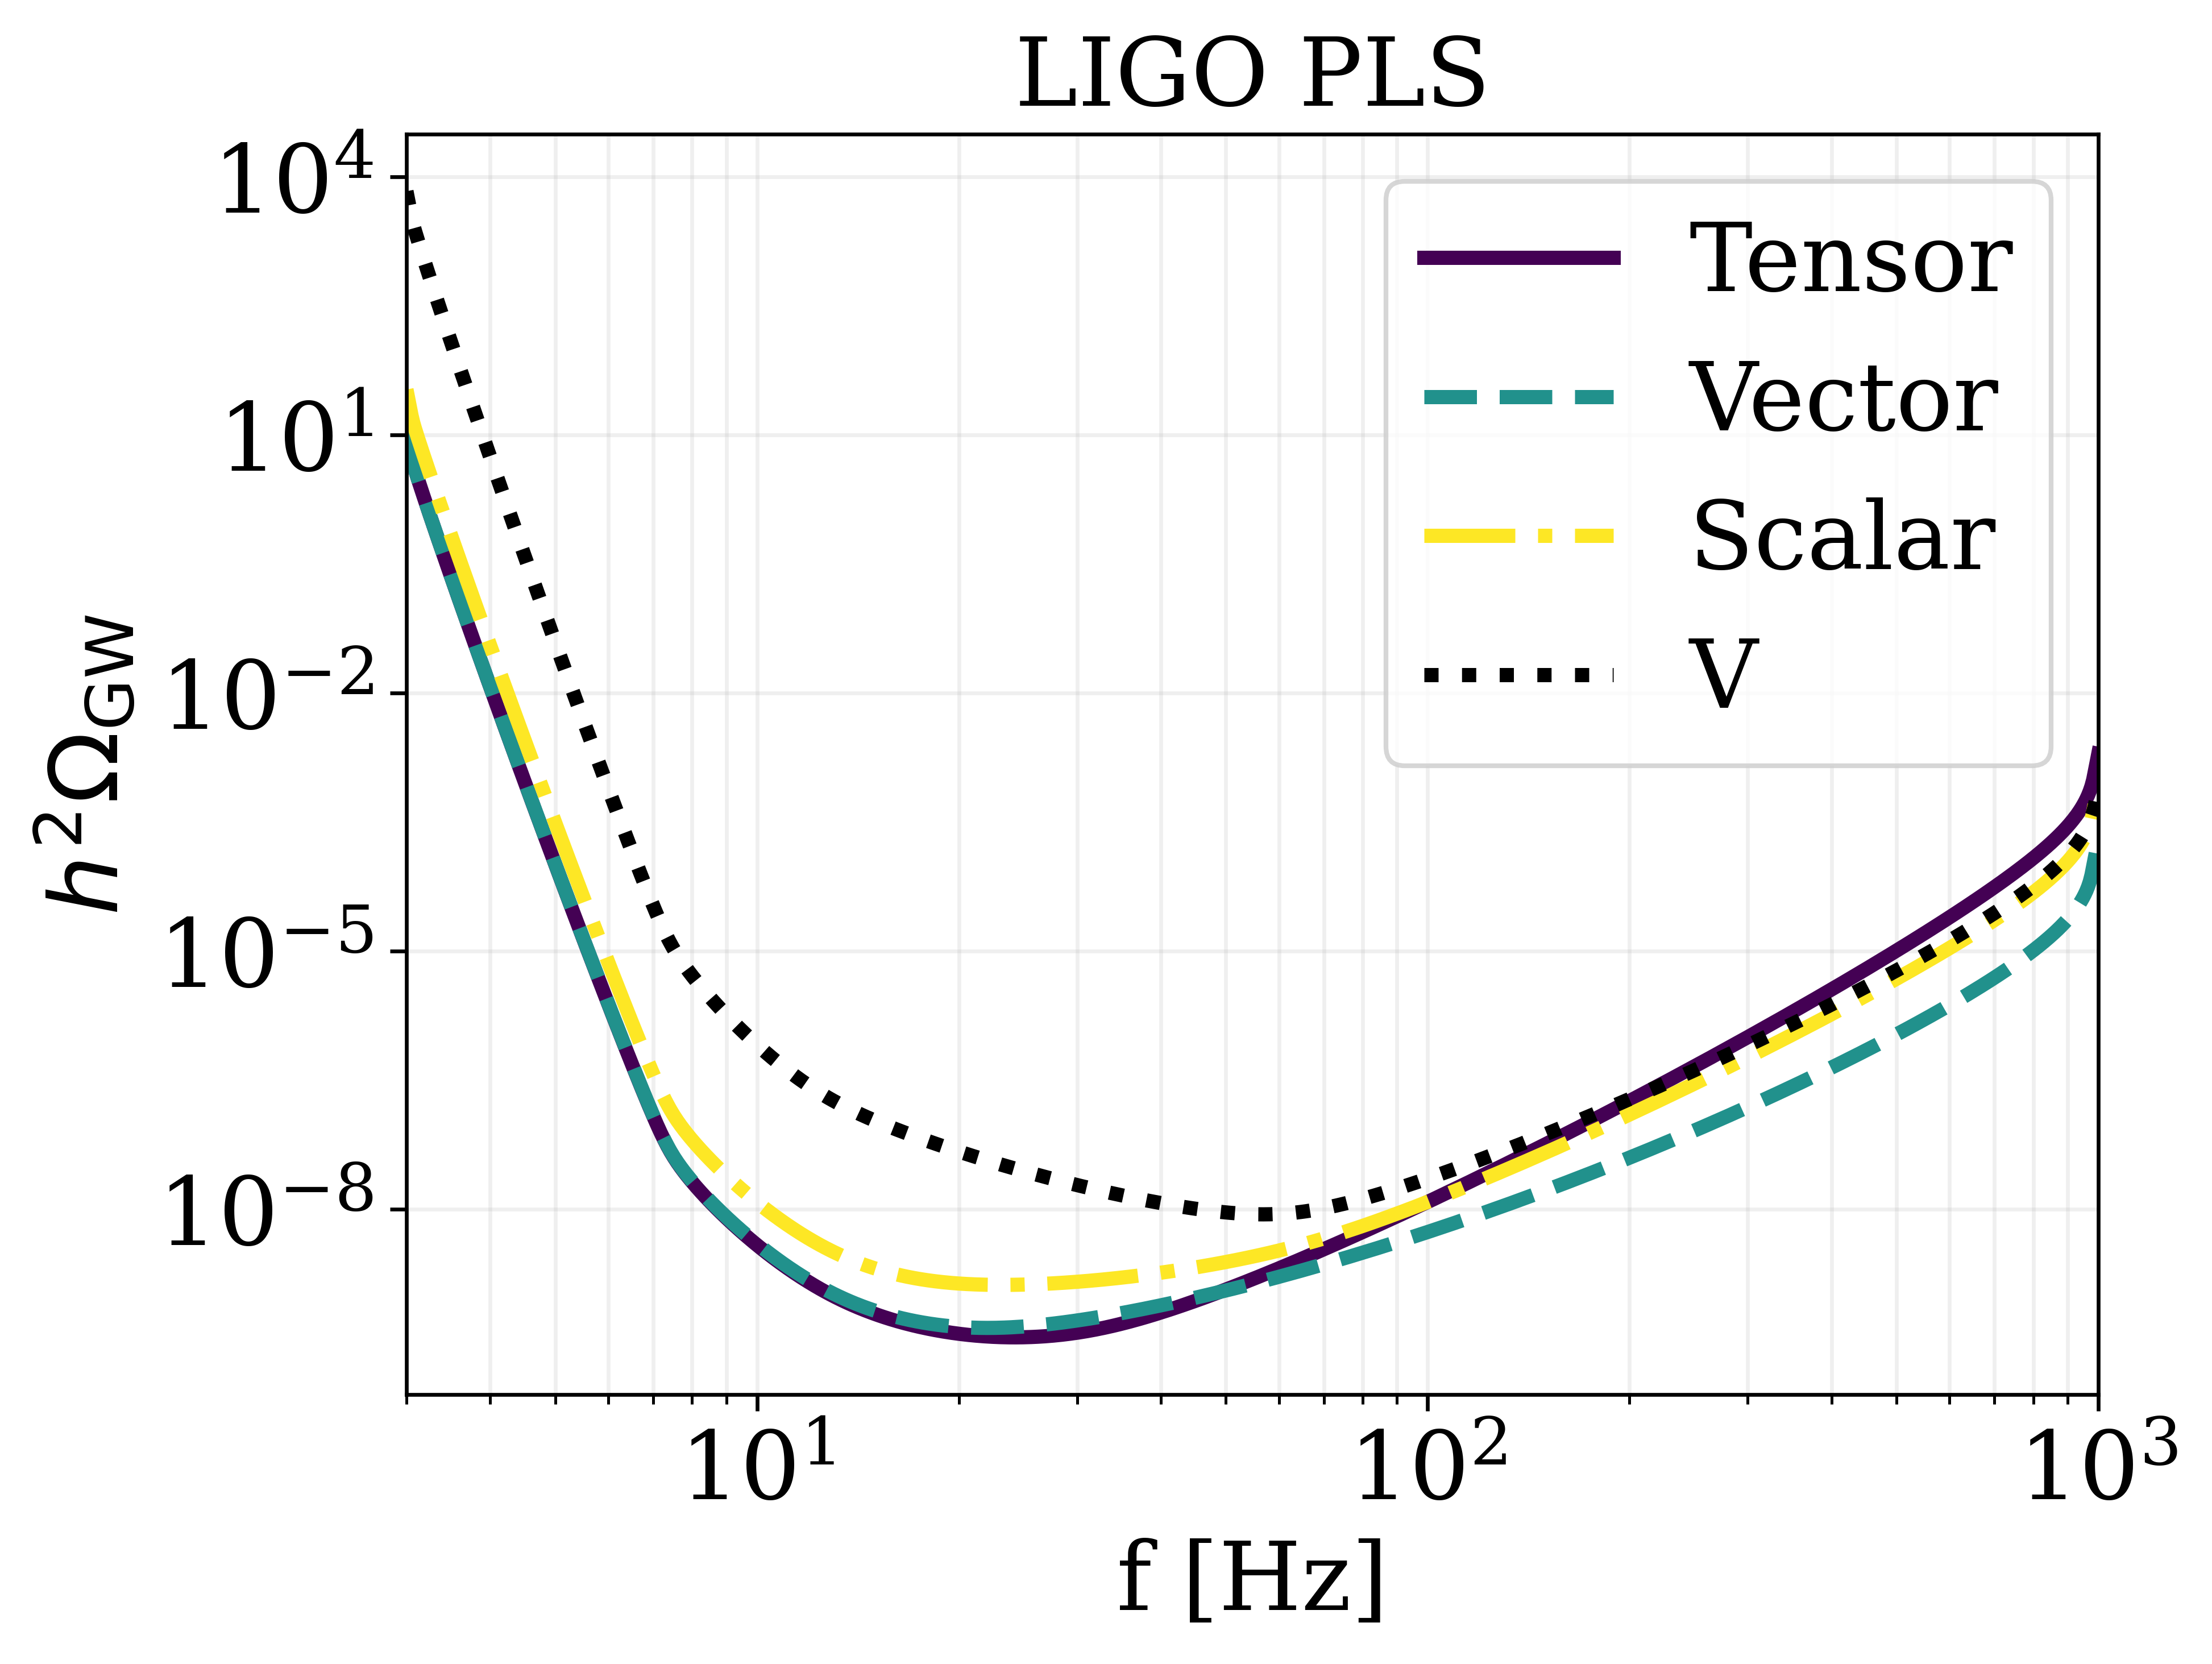

In [122]:
fref = 25
snr = 1
Tobs = 1

pls_t = pls.PLS('LIGO H', 'LIGO L', f, fref, 't', snr, Tobs, 0)
pls_v = pls.PLS('LIGO H', 'LIGO L', f, fref, 'v', snr, Tobs, 0)
pls_s = pls.PLS('LIGO H', 'LIGO L', f, fref, 's', snr, Tobs, 0)
pls_V = pls.PLS('LIGO H', 'LIGO L', f, fref, 'V', snr, Tobs, 0)

idx_min_t = np.argmin(pls_t)
idx_min_v = np.argmin(pls_v)
idx_min_s = np.argmin(pls_s)
idx_min_V = np.argmin(pls_V)


print("Min pls_t:", pls_t[idx_min_t], "f min:", f[idx_min_t])
print("Min pls_v:", pls_v[idx_min_v], "f min:", f[idx_min_v])
print("Min pls_s:", pls_s[idx_min_s], "f min:", f[idx_min_s])
print("Min pls_V:", pls_V[idx_min_V], "f min:", f[idx_min_V])

colors = plt.cm.viridis(np.linspace(0, 1, 3))

plt.plot(f, pls_t, label='Tensor', color=colors[0], rasterized=True)
plt.plot(f, pls_v, label='Vector', color=colors[1], linestyle='--', rasterized=True)
plt.plot(f, pls_s, label='Scalar', color=colors[2], linestyle='-.', rasterized=True)
plt.plot(f, pls_V, label='V', color='black', linestyle=':', rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{\rm GW}$')
plt.title('LIGO PLS')
plt.grid(alpha=0.2, which='both')
plt.legend()
plt.xlim(3, 1000)


* Angular Response

In [123]:
print('Calculating Angular response for the monopole...')   
print('- tensor modes')
R0_t = AngularResponse.R_ell(0, 'LIGO H', 'LIGO L', f, 't', 0, shift_angle=None)
print('- vector modes')
R0_v = AngularResponse.R_ell(0, 'LIGO H', 'LIGO L', f, 'v', 0, shift_angle=None)
print('- scalar modes')
R0_s = AngularResponse.R_ell(0, 'LIGO H', 'LIGO L', f, 's', 0, shift_angle=None)
print('- V')
R0_V = AngularResponse.R_ell(0, 'LIGO H', 'LIGO L', f, 'V', 0, shift_angle=None)

print('Calculating Angular response for the dipole...')   
print('- tensor modes')
R1_t = AngularResponse.R_ell(1, 'LIGO H', 'LIGO L', f, 't', 0, shift_angle=None)
print('- vector modes')
R1_v = AngularResponse.R_ell(1, 'LIGO H', 'LIGO L', f, 'v', 0, shift_angle=None)
print('- scalar modes')
R1_s = AngularResponse.R_ell(1, 'LIGO H', 'LIGO L', f, 's', 0, shift_angle=None)
print('- V')
R1_V = AngularResponse.R_ell(1, 'LIGO H', 'LIGO L', f, 'V', 0, shift_angle=None)

print('Calculating Angular response for the quadrupole...')   
print('- tensor modes')
R2_t = AngularResponse.R_ell(2, 'LIGO H', 'LIGO L', f, 't', 0, shift_angle=None)
print('- vector modes')
R2_v = AngularResponse.R_ell(2, 'LIGO H', 'LIGO L', f, 'v', 0, shift_angle=None)
print('- scalar modes')
R2_s = AngularResponse.R_ell(2, 'LIGO H', 'LIGO L', f, 's', 0, shift_angle=None)
print('- V')
R2_V = AngularResponse.R_ell(2, 'LIGO H', 'LIGO L', f, 'V', 0, shift_angle=None)

print('Calculating Angular response for the octupole...')   
print('- tensor modes')
R3_t = AngularResponse.R_ell(3, 'LIGO H', 'LIGO L', f, 't', 0, shift_angle=None)
print('- vector modes')
R3_v = AngularResponse.R_ell(3, 'LIGO H', 'LIGO L', f, 'v', 0, shift_angle=None)
print('- scalar modes')
R3_s = AngularResponse.R_ell(3, 'LIGO H', 'LIGO L', f, 's', 0, shift_angle=None)
print('- V')
R3_V = AngularResponse.R_ell(3, 'LIGO H', 'LIGO L', f, 'V', 0, shift_angle=None)


Calculating Angular response for the monopole...
- tensor modes
- vector modes
- scalar modes
- V
Calculating Angular response for the dipole...
- tensor modes
- vector modes
- scalar modes
- V
Calculating Angular response for the quadrupole...
- tensor modes
- vector modes
- scalar modes
- V
Calculating Angular response for the octupole...
- tensor modes
- vector modes
- scalar modes
- V


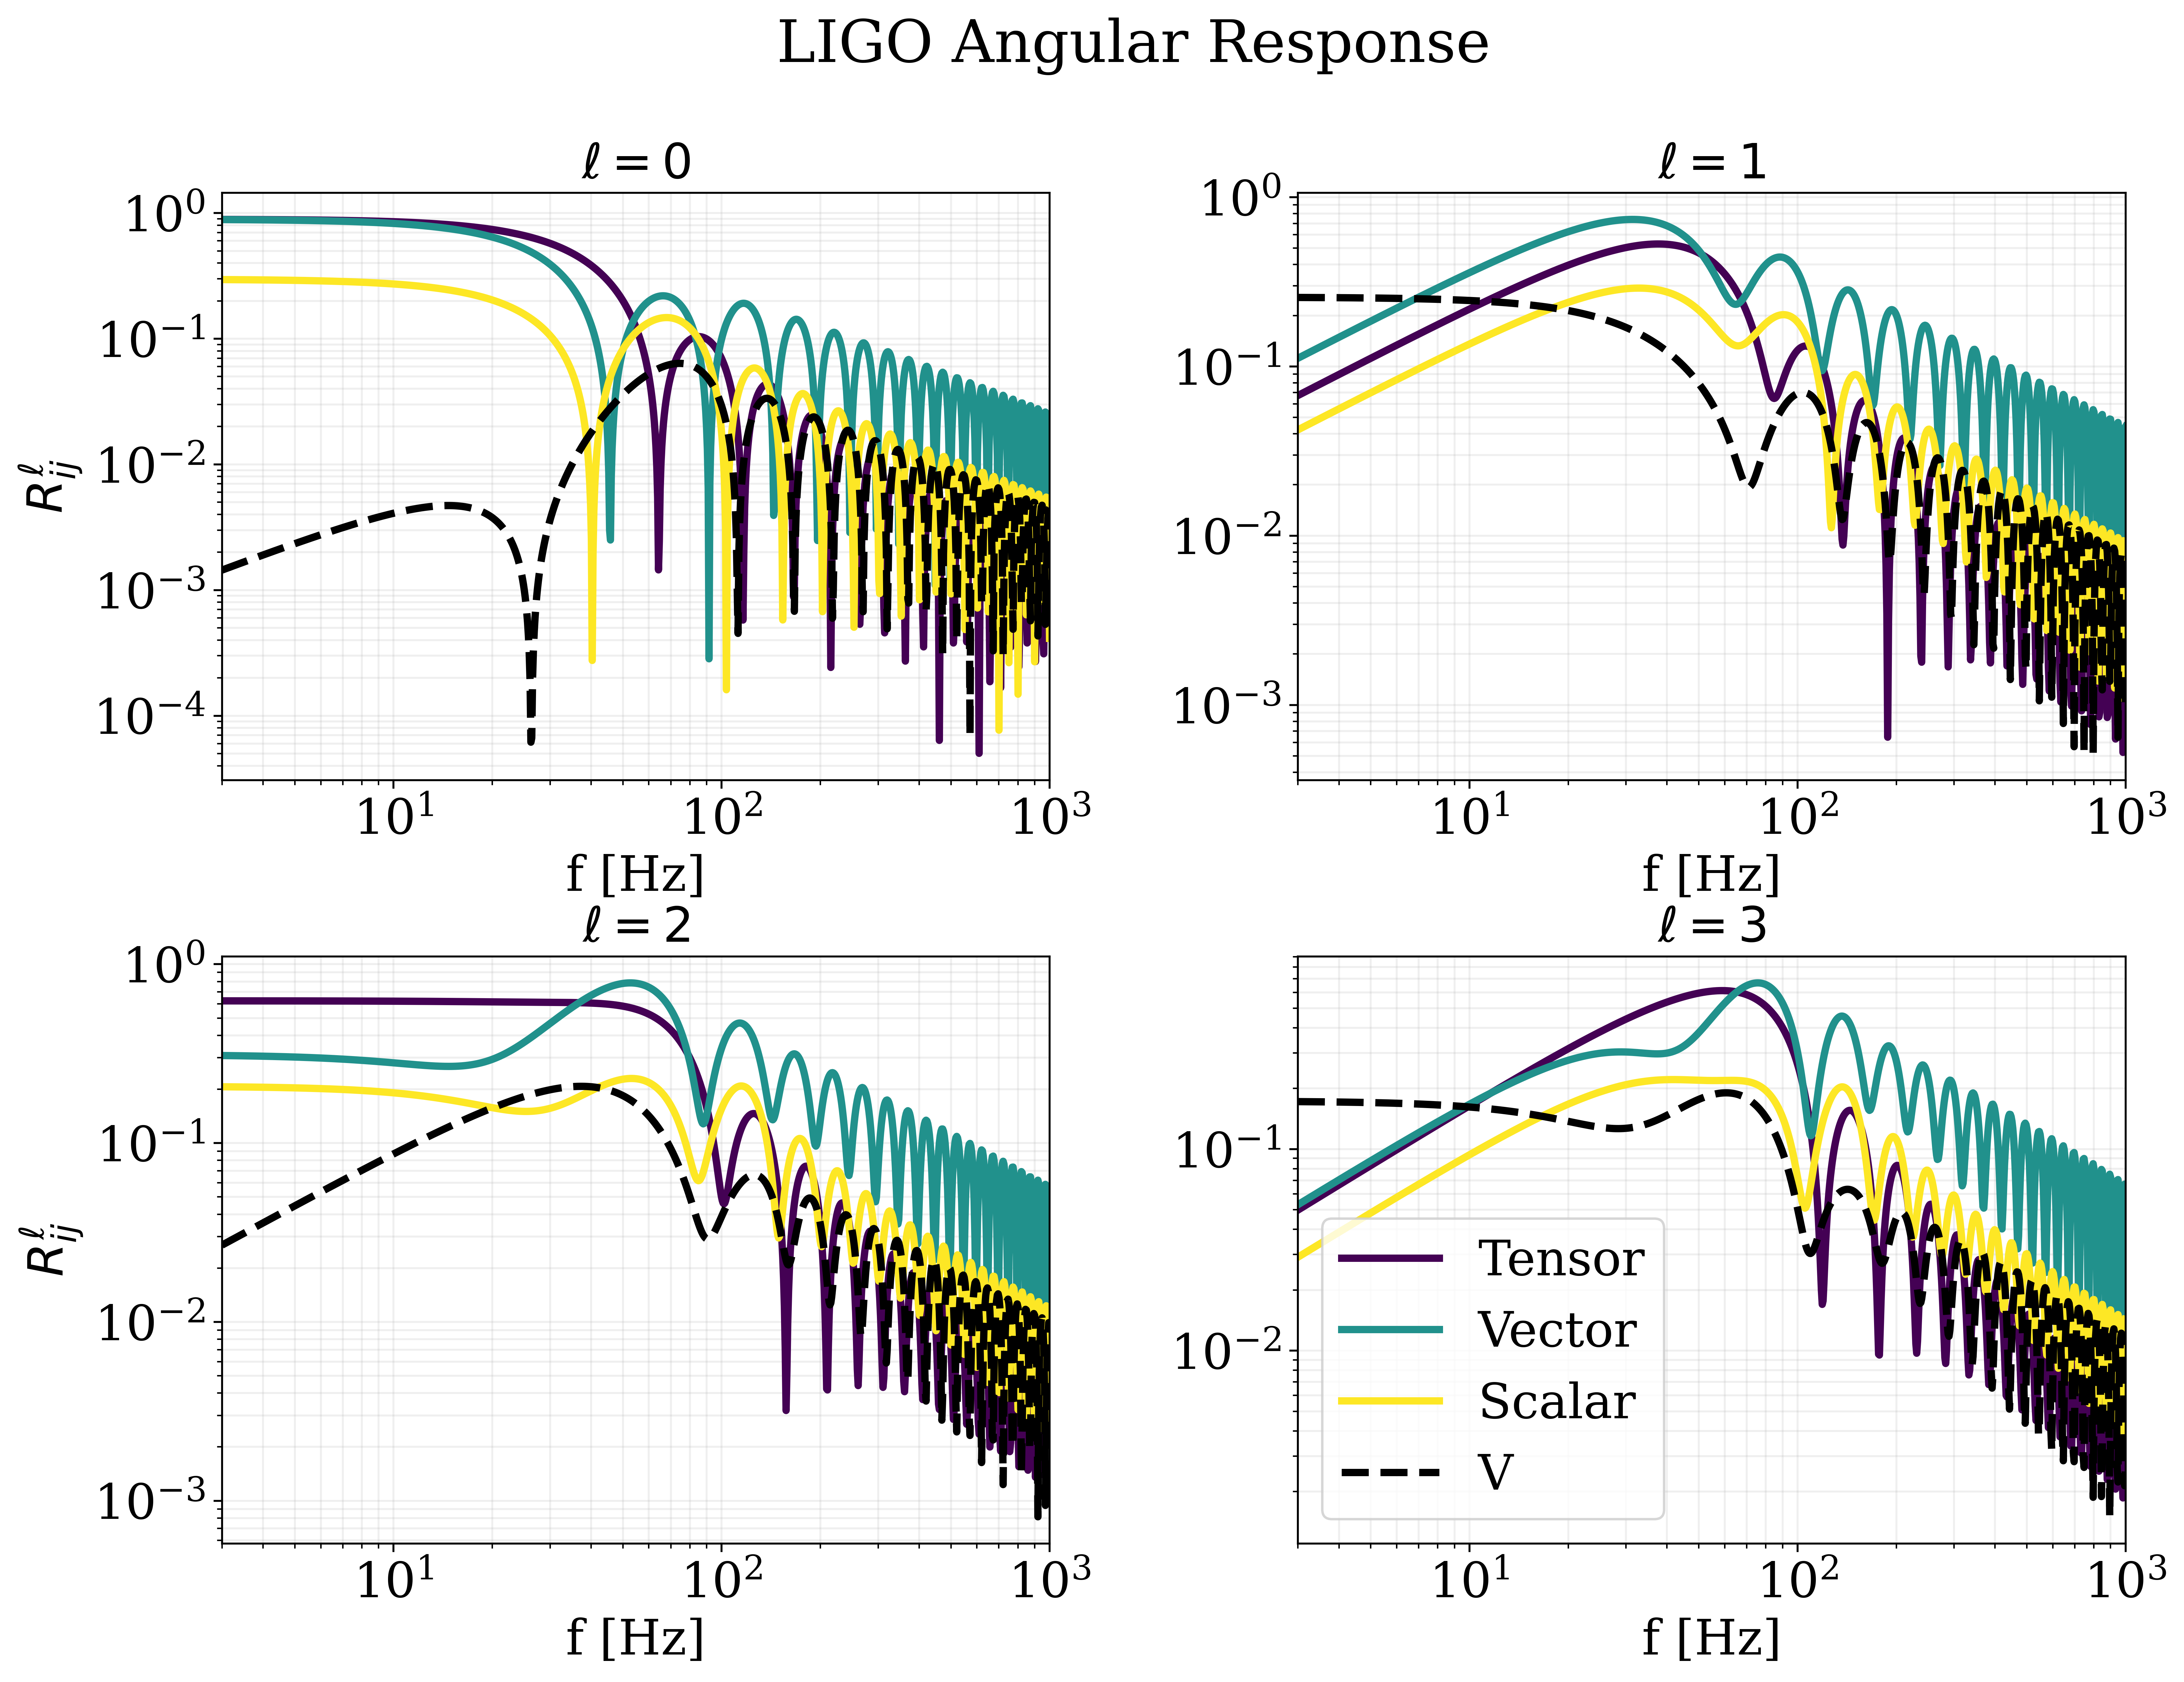

In [135]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10), gridspec_kw={'wspace': 0.3, 'hspace': 0.3})
colors = cm.viridis(np.linspace(0, 1, 3))
# monopole
axs[0, 0].plot(f, R0_t, label='Tensor', color=colors[0], rasterized=True)
axs[0, 0].plot(f, R0_v, label='Vector', color=colors[1], rasterized=True)
axs[0, 0].plot(f, R0_s, label='Scalar', color=colors[2], rasterized=True)
axs[0, 0].plot(f, R0_V, label='V', color='k', linestyle='--', rasterized=True)
axs[0, 0].set_xscale('log')
axs[0, 0].set_yscale('log')
axs[0, 0].set_xlabel('f [Hz]')
axs[0, 0].set_ylabel(r'$R_{ij}^{\ell}$')
#axs[0, 0].legend()
axs[0, 0].grid(alpha=0.2, which='both')
axs[0, 0].set_title(r'$\ell = 0$')
axs[0, 0].set_xlim(3, 1000)

# dipole
axs[0, 1].plot(f, R1_t, label='Tensor', color=colors[0], rasterized=True)
axs[0, 1].plot(f, R1_v, label='Vector', color=colors[1], rasterized=True)
axs[0, 1].plot(f, R1_s, label='Scalar', color=colors[2], rasterized=True)
axs[0, 1].plot(f, R1_V, label='V', color='k', linestyle='--', rasterized=True)
axs[0, 1].set_xscale('log')
axs[0, 1].set_yscale('log')
axs[0, 1].set_xlabel('f [Hz]')
#axs[0, 1].legend()
axs[0, 1].grid(alpha=0.2, which='both')
axs[0, 1].set_title(r'$\ell = 1$')
axs[0, 1].set_xlim(3, 1000)

# quadrupole
axs[1, 0].plot(f, R2_t, label='Tensor', color=colors[0], rasterized=True)
axs[1, 0].plot(f, R2_v, label='Vector', color=colors[1], rasterized=True)
axs[1, 0].plot(f, R2_s, label='Scalar', color=colors[2], rasterized=True)
axs[1, 0].plot(f, R2_V, label='V', color='k', linestyle='--', rasterized=True)
axs[1, 0].set_xscale('log')
axs[1, 0].set_yscale('log')
axs[1, 0].set_xlabel('f [Hz]')
axs[1, 0].set_ylabel(r'$R_{ij}^{\ell}$')
#axs[1, 0].legend()
axs[1, 0].grid(alpha=0.2, which='both')
axs[1, 0].set_title(r'$\ell = 2$')
axs[1, 0].set_xlim(3, 1000)

# octupole
axs[1, 1].plot(f, R3_t, label='Tensor', color=colors[0], rasterized=True)
axs[1, 1].plot(f, R3_v, label='Vector', color=colors[1], rasterized=True)
axs[1, 1].plot(f, R3_s, label='Scalar', color=colors[2], rasterized=True)
axs[1, 1].plot(f, R3_V, label='V', color='k', linestyle='--', rasterized=True)
axs[1, 1].set_xscale('log')
axs[1, 1].set_yscale('log')
axs[1, 1].set_xlabel('f [Hz]')
axs[1, 1].legend()
axs[1, 1].grid(alpha=0.2, which='both')
axs[1, 1].set_title(r'$\ell = 3$')
axs[1, 1].set_xlim(3, 1000)


fig.suptitle('LIGO Angular Response ')

plt.show()

* Angular sensitivity

Min pls_0_t: 3.242619946649391e-10 f min: 24.195875677632408
Min pls_1_t: 1.246397700308569e-08 f min: 31.616219294043507
Min pls_2_t: 9.551050615642128e-09 f min: 29.83018135815315
Min pls_3_t: 1.2548284780110752e-08 f min: 36.56327079786592


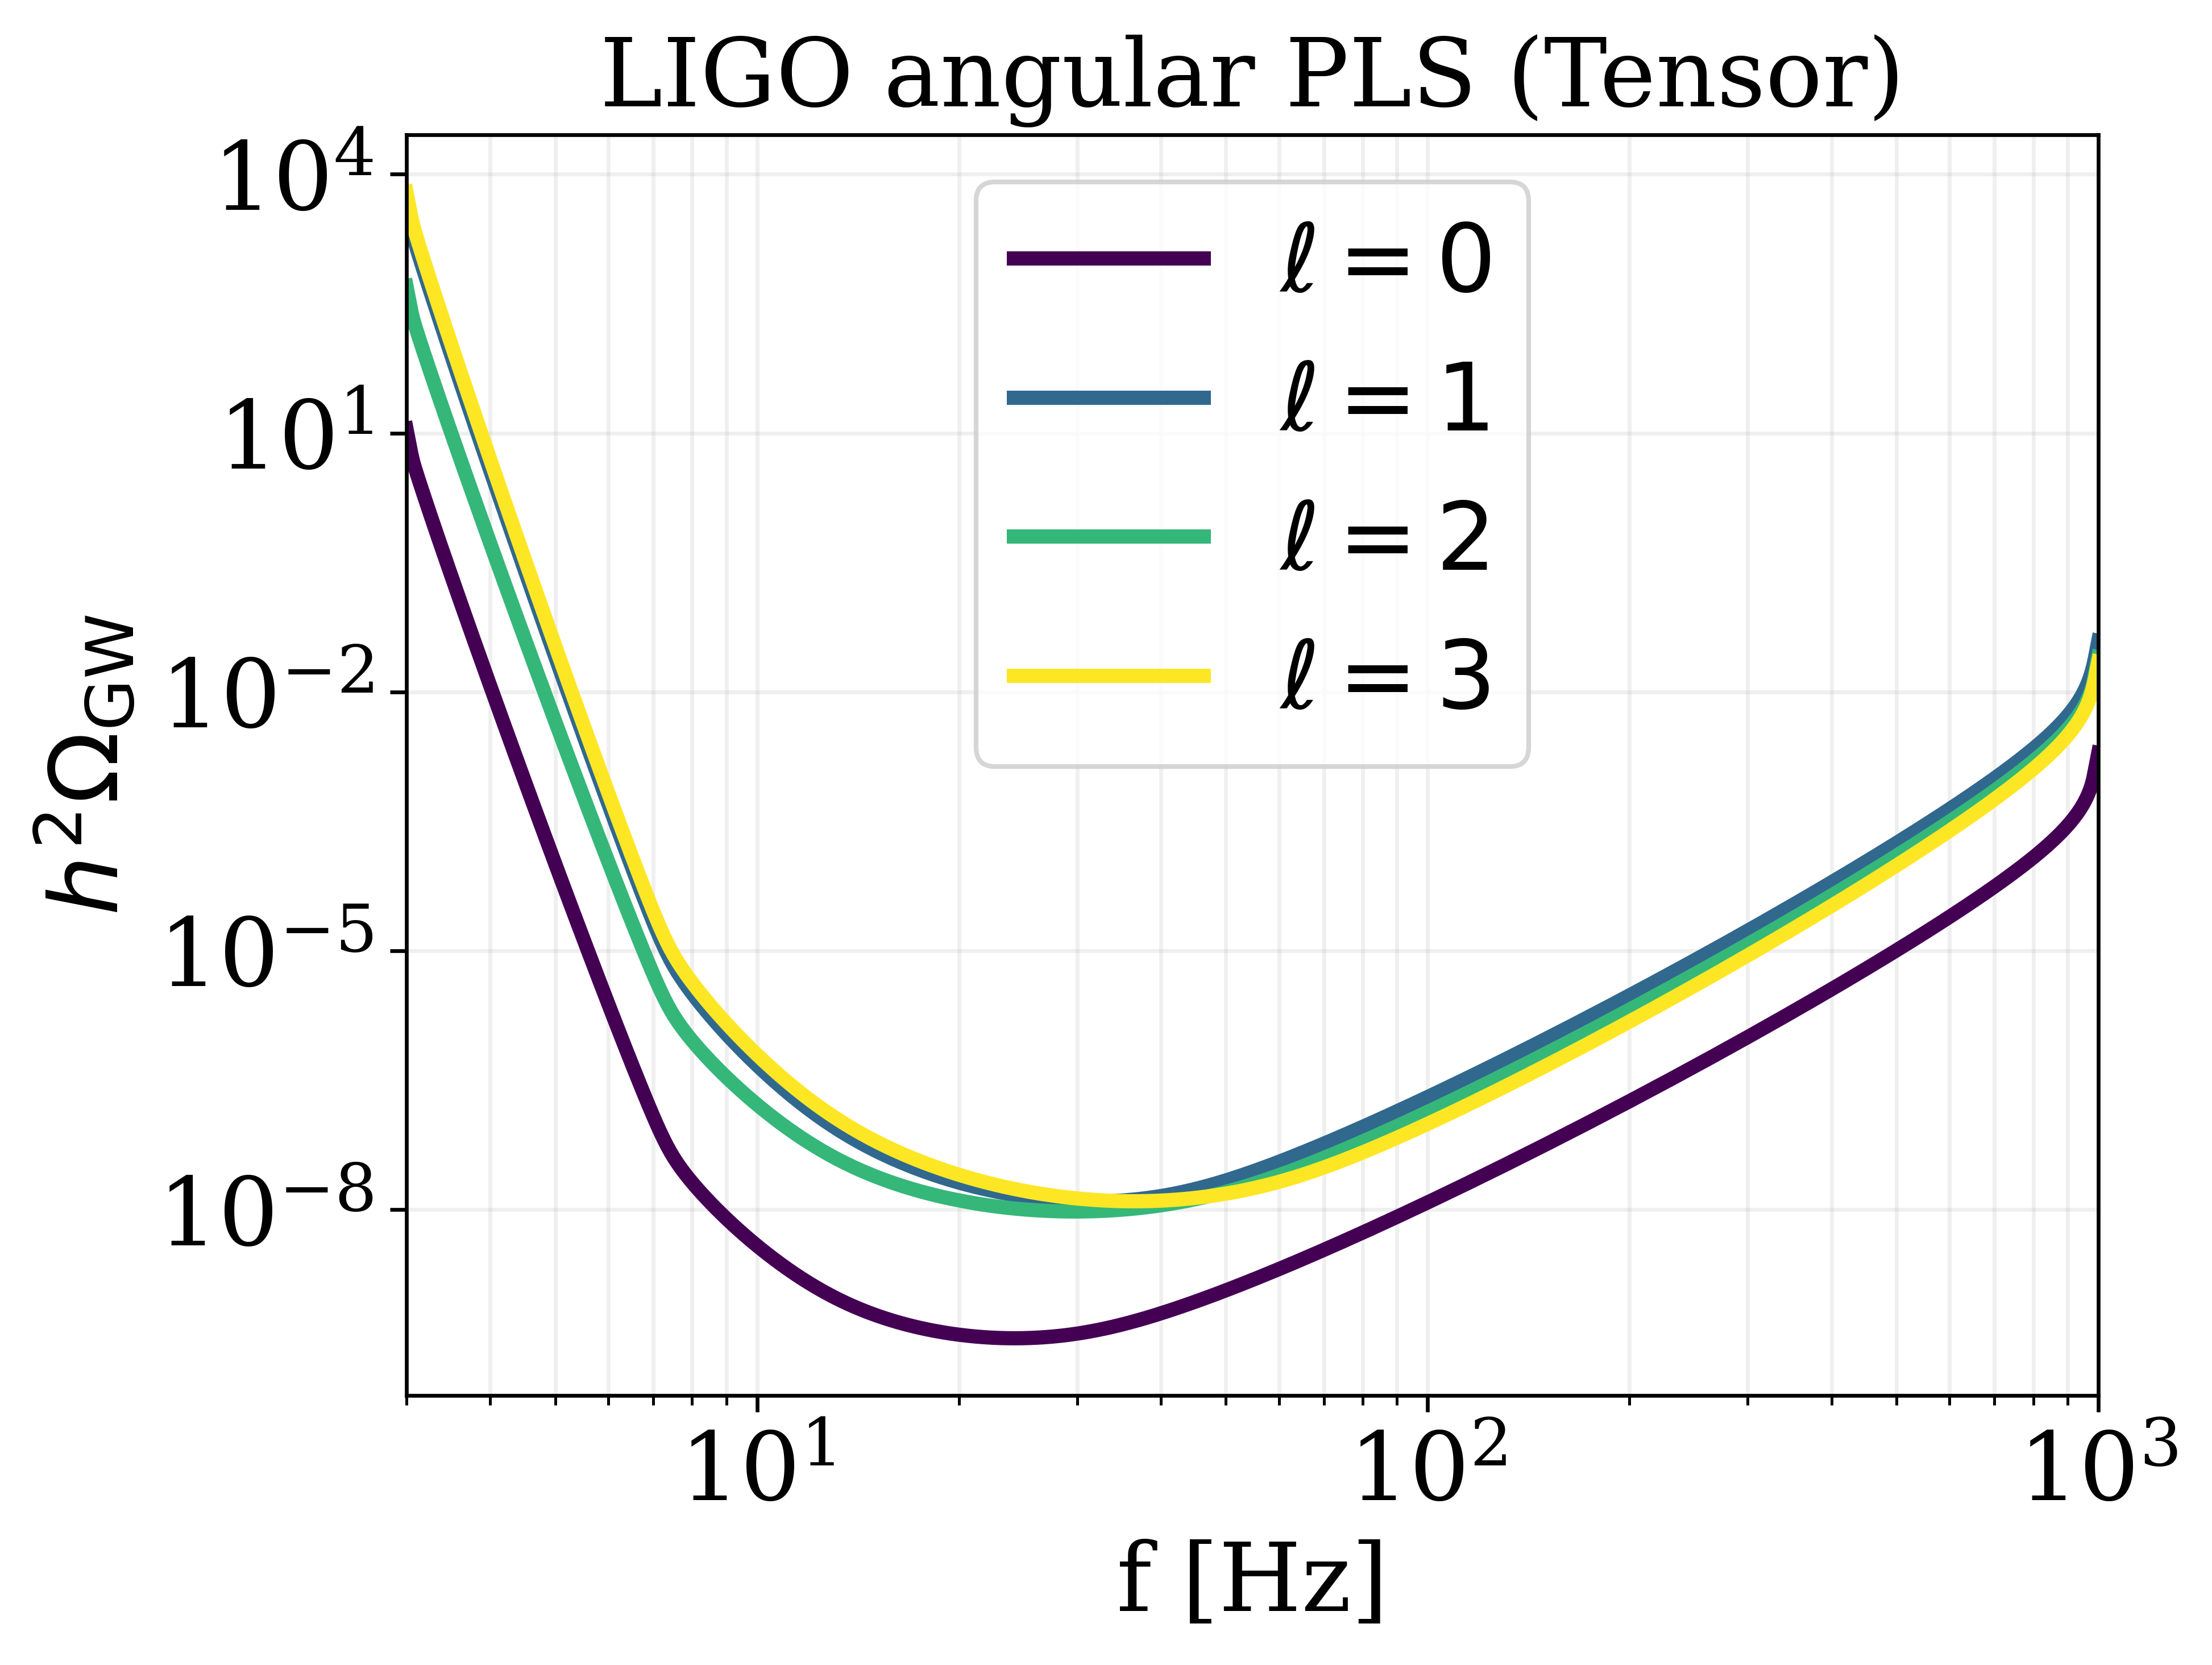

In [125]:
fref = 25
snr = 1
Tobs = 1


#tensor modes

pls0_t = Sensitivity_ell.APLS_ell('LIGO H', 'LIGO L', 0, f, 't', 0, fref, snr, Tobs, 1)
pls1_t = Sensitivity_ell.APLS_ell('LIGO H', 'LIGO L', 1, f, 't', 0, fref, snr, Tobs, 1e-3)
pls2_t = Sensitivity_ell.APLS_ell('LIGO H', 'LIGO L', 2, f, 't', 0, fref, snr, Tobs, 1e-3)
pls3_t = Sensitivity_ell.APLS_ell('LIGO H', 'LIGO L', 3, f, 't', 0, fref, snr, Tobs, 1e-3)
                                     
idx_min_0_t = np.argmin(pls0_t)
idx_min_1_t = np.argmin(pls1_t)
idx_min_2_t = np.argmin(pls2_t)
idx_min_3_t = np.argmin(pls3_t)

print("Min pls_0_t:", pls0_t[idx_min_0_t], "f min:", f[idx_min_0_t])
print("Min pls_1_t:", pls1_t[idx_min_1_t], "f min:", f[idx_min_1_t])
print("Min pls_2_t:", pls2_t[idx_min_2_t], "f min:", f[idx_min_2_t])
print("Min pls_3_t:", pls3_t[idx_min_3_t], "f min:", f[idx_min_3_t])

colors = plt.cm.viridis(np.linspace(0, 1, 4))
plt.plot(f, pls0_t, label=r'$\ell=0$', color=colors[0], rasterized=True)
plt.plot(f, pls1_t, label=r'$\ell=1$', color=colors[1], rasterized=True)
plt.plot(f, pls2_t, label=r'$\ell=2$', color=colors[2], rasterized=True)
plt.plot(f, pls3_t, label=r'$\ell=3$', color=colors[3], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{ \rm GW}$')
plt.title('LIGO angular PLS (Tensor)')
plt.grid(alpha=0.2, which='both')
plt.xlim(3, 1000)
plt.legend()

Min pls_0_v: 4.173707449369712e-10 f min: 22.046257617413627
Min pls_1_v: 8.8957785623861e-09 f min: 29.83018135815315
Min pls_2_v: 1.0967832849958952e-08 f min: 38.082273525188825
Min pls_3_v: 1.728984706803696e-08 f min: 37.423694186247715


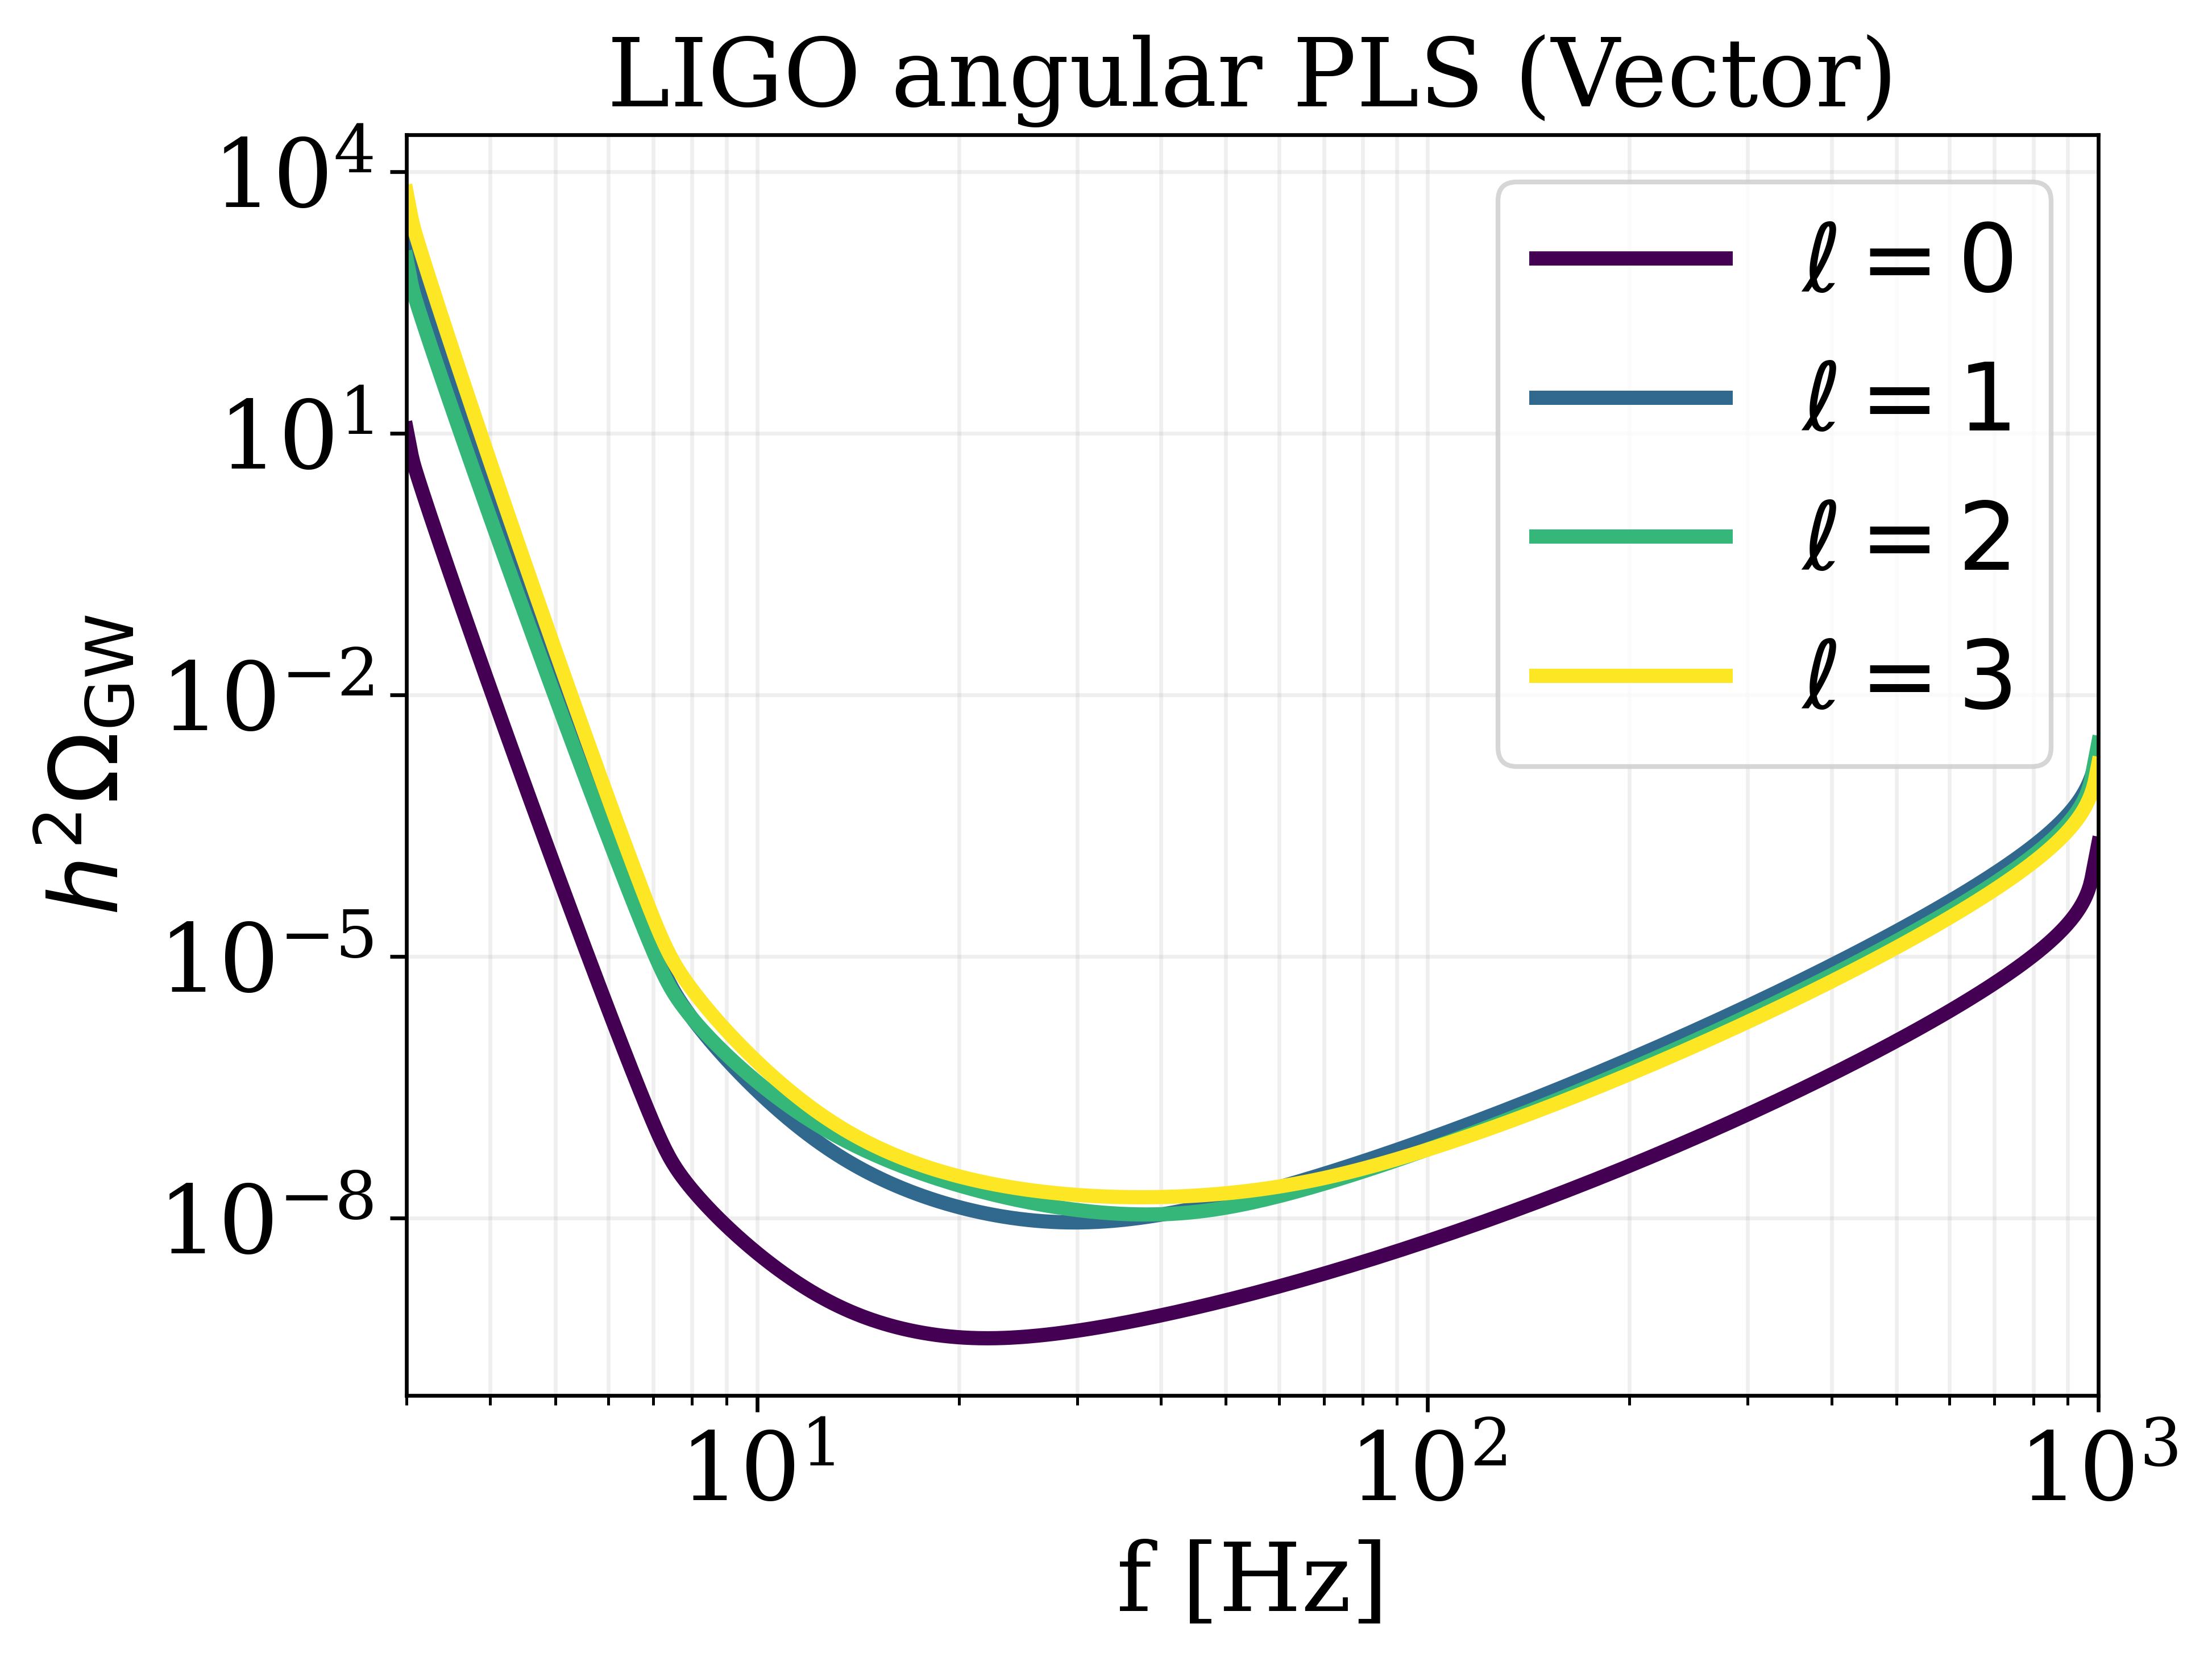

In [126]:
#vector modes

fref = 25
snr = 1
Tobs = 1

pls0_v = Sensitivity_ell.APLS_ell('LIGO H', 'LIGO L', 0, f, 'v', 0, fref, snr, Tobs, 1)
pls1_v = Sensitivity_ell.APLS_ell('LIGO H', 'LIGO L', 1, f, 'v', 0, fref, snr, Tobs, 1e-3)
pls2_v = Sensitivity_ell.APLS_ell('LIGO H', 'LIGO L', 2, f, 'v', 0, fref, snr, Tobs, 1e-3)
pls3_v = Sensitivity_ell.APLS_ell('LIGO H', 'LIGO L', 3, f, 'v', 0, fref, snr, Tobs, 1e-3)
                                     
idx_min_0_v = np.argmin(pls0_v)
idx_min_1_v = np.argmin(pls1_v)
idx_min_2_v = np.argmin(pls2_v)
idx_min_3_v = np.argmin(pls3_v)

print("Min pls_0_v:", pls0_v[idx_min_0_v], "f min:", f[idx_min_0_v])
print("Min pls_1_v:", pls1_v[idx_min_1_v], "f min:", f[idx_min_1_v])
print("Min pls_2_v:", pls2_v[idx_min_2_v], "f min:", f[idx_min_2_v])
print("Min pls_3_v:", pls3_v[idx_min_3_v], "f min:", f[idx_min_3_v])

colors = plt.cm.viridis(np.linspace(0, 1, 4))
plt.plot(f, pls0_v, label=r'$\ell=0$', color=colors[0], rasterized=True)
plt.plot(f, pls1_v, label=r'$\ell=1$', color=colors[1], rasterized=True)
plt.plot(f, pls2_v, label=r'$\ell=2$', color=colors[2], rasterized=True)
plt.plot(f, pls3_v, label=r'$\ell=3$', color=colors[3], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{ \rm GW}$')
plt.title('LIGO angular PLS (Vector)')
plt.grid(alpha=0.2, which='both')
plt.xlim(3, 1000)
plt.legend()

Min pls_0_s: 1.3201123323231026e-09 f min: 23.09607127777356
Min pls_1_s: 2.239961919263416e-08 f min: 30.53215864738745
Min pls_2_s: 3.2552981360193526e-08 f min: 33.12174188566945
Min pls_3_s: 2.856209895596751e-08 f min: 33.50919360655658


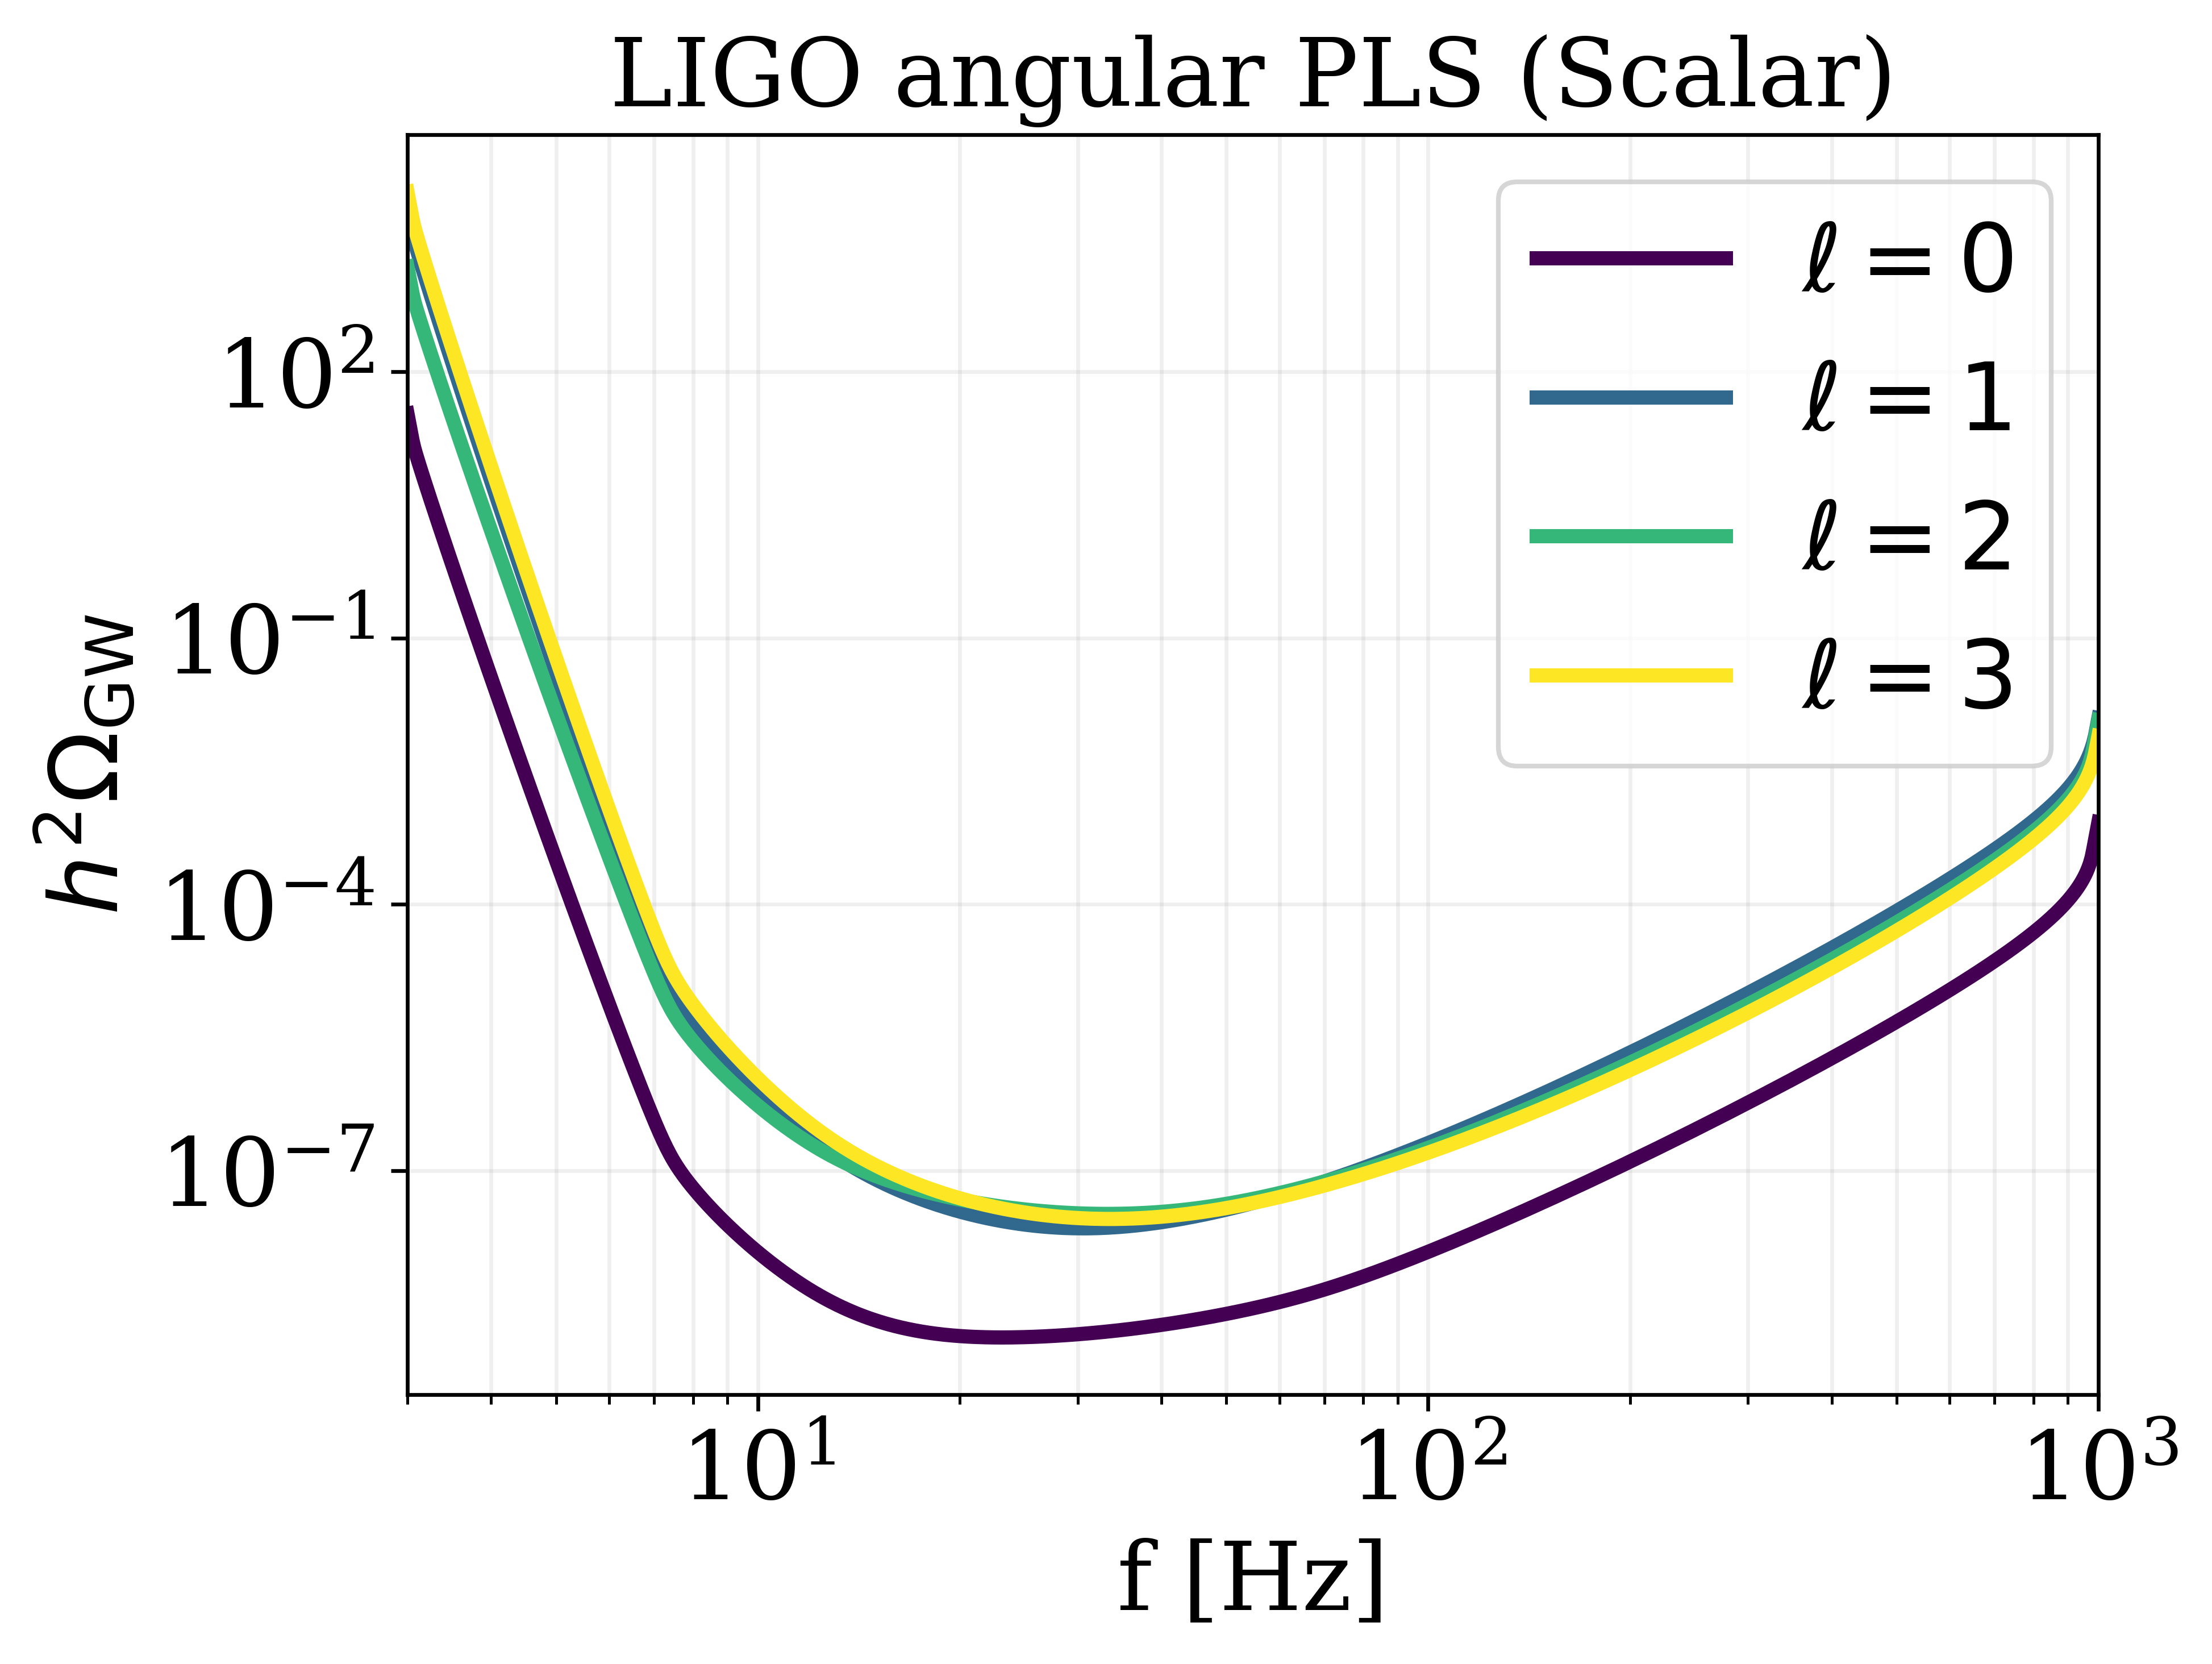

In [127]:
#scalar modes

fref = 25
snr = 1
Tobs = 1

pls0_s = Sensitivity_ell.APLS_ell('LIGO H', 'LIGO L', 0, f, 's', 0, fref, snr, Tobs, 1)
pls1_s = Sensitivity_ell.APLS_ell('LIGO H', 'LIGO L', 1, f, 's', 0, fref, snr, Tobs, 1e-3)
pls2_s = Sensitivity_ell.APLS_ell('LIGO H', 'LIGO L', 2, f, 's', 0, fref, snr, Tobs, 1e-3)
pls3_s = Sensitivity_ell.APLS_ell('LIGO H', 'LIGO L', 3, f, 's', 0, fref, snr, Tobs, 1e-3)
                                     
idx_min_0_s = np.argmin(pls0_s)
idx_min_1_s = np.argmin(pls1_s)
idx_min_2_s = np.argmin(pls2_s)
idx_min_3_s = np.argmin(pls3_s)

print("Min pls_0_s:", pls0_s[idx_min_0_s], "f min:", f[idx_min_0_s])
print("Min pls_1_s:", pls1_s[idx_min_1_s], "f min:", f[idx_min_1_s])
print("Min pls_2_s:", pls2_s[idx_min_2_s], "f min:", f[idx_min_2_s])
print("Min pls_3_s:", pls3_s[idx_min_3_s], "f min:", f[idx_min_3_s])

colors = plt.cm.viridis(np.linspace(0, 1, 4))
plt.plot(f, pls0_s, label=r'$\ell=0$', color=colors[0], rasterized=True)
plt.plot(f, pls1_s, label=r'$\ell=1$', color=colors[1], rasterized=True)
plt.plot(f, pls2_s, label=r'$\ell=2$', color=colors[2], rasterized=True)
plt.plot(f, pls3_s, label=r'$\ell=3$', color=colors[3], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{\rm GW}$')
plt.title('LIGO angular PLS (Scalar)')
plt.grid(alpha=0.2, which='both')
plt.xlim(3, 1000)
plt.legend()

Min pls_0_V: 8.728325025076337e-09 f min: 56.882117397059574
Min pls_1_V: 3.4555874923586867e-08 f min: 24.765263942990448
Min pls_2_V: 3.1589418955528637e-08 f min: 31.616219294043507
Min pls_3_V: 3.9795980773792326e-08 f min: 32.73877009461237


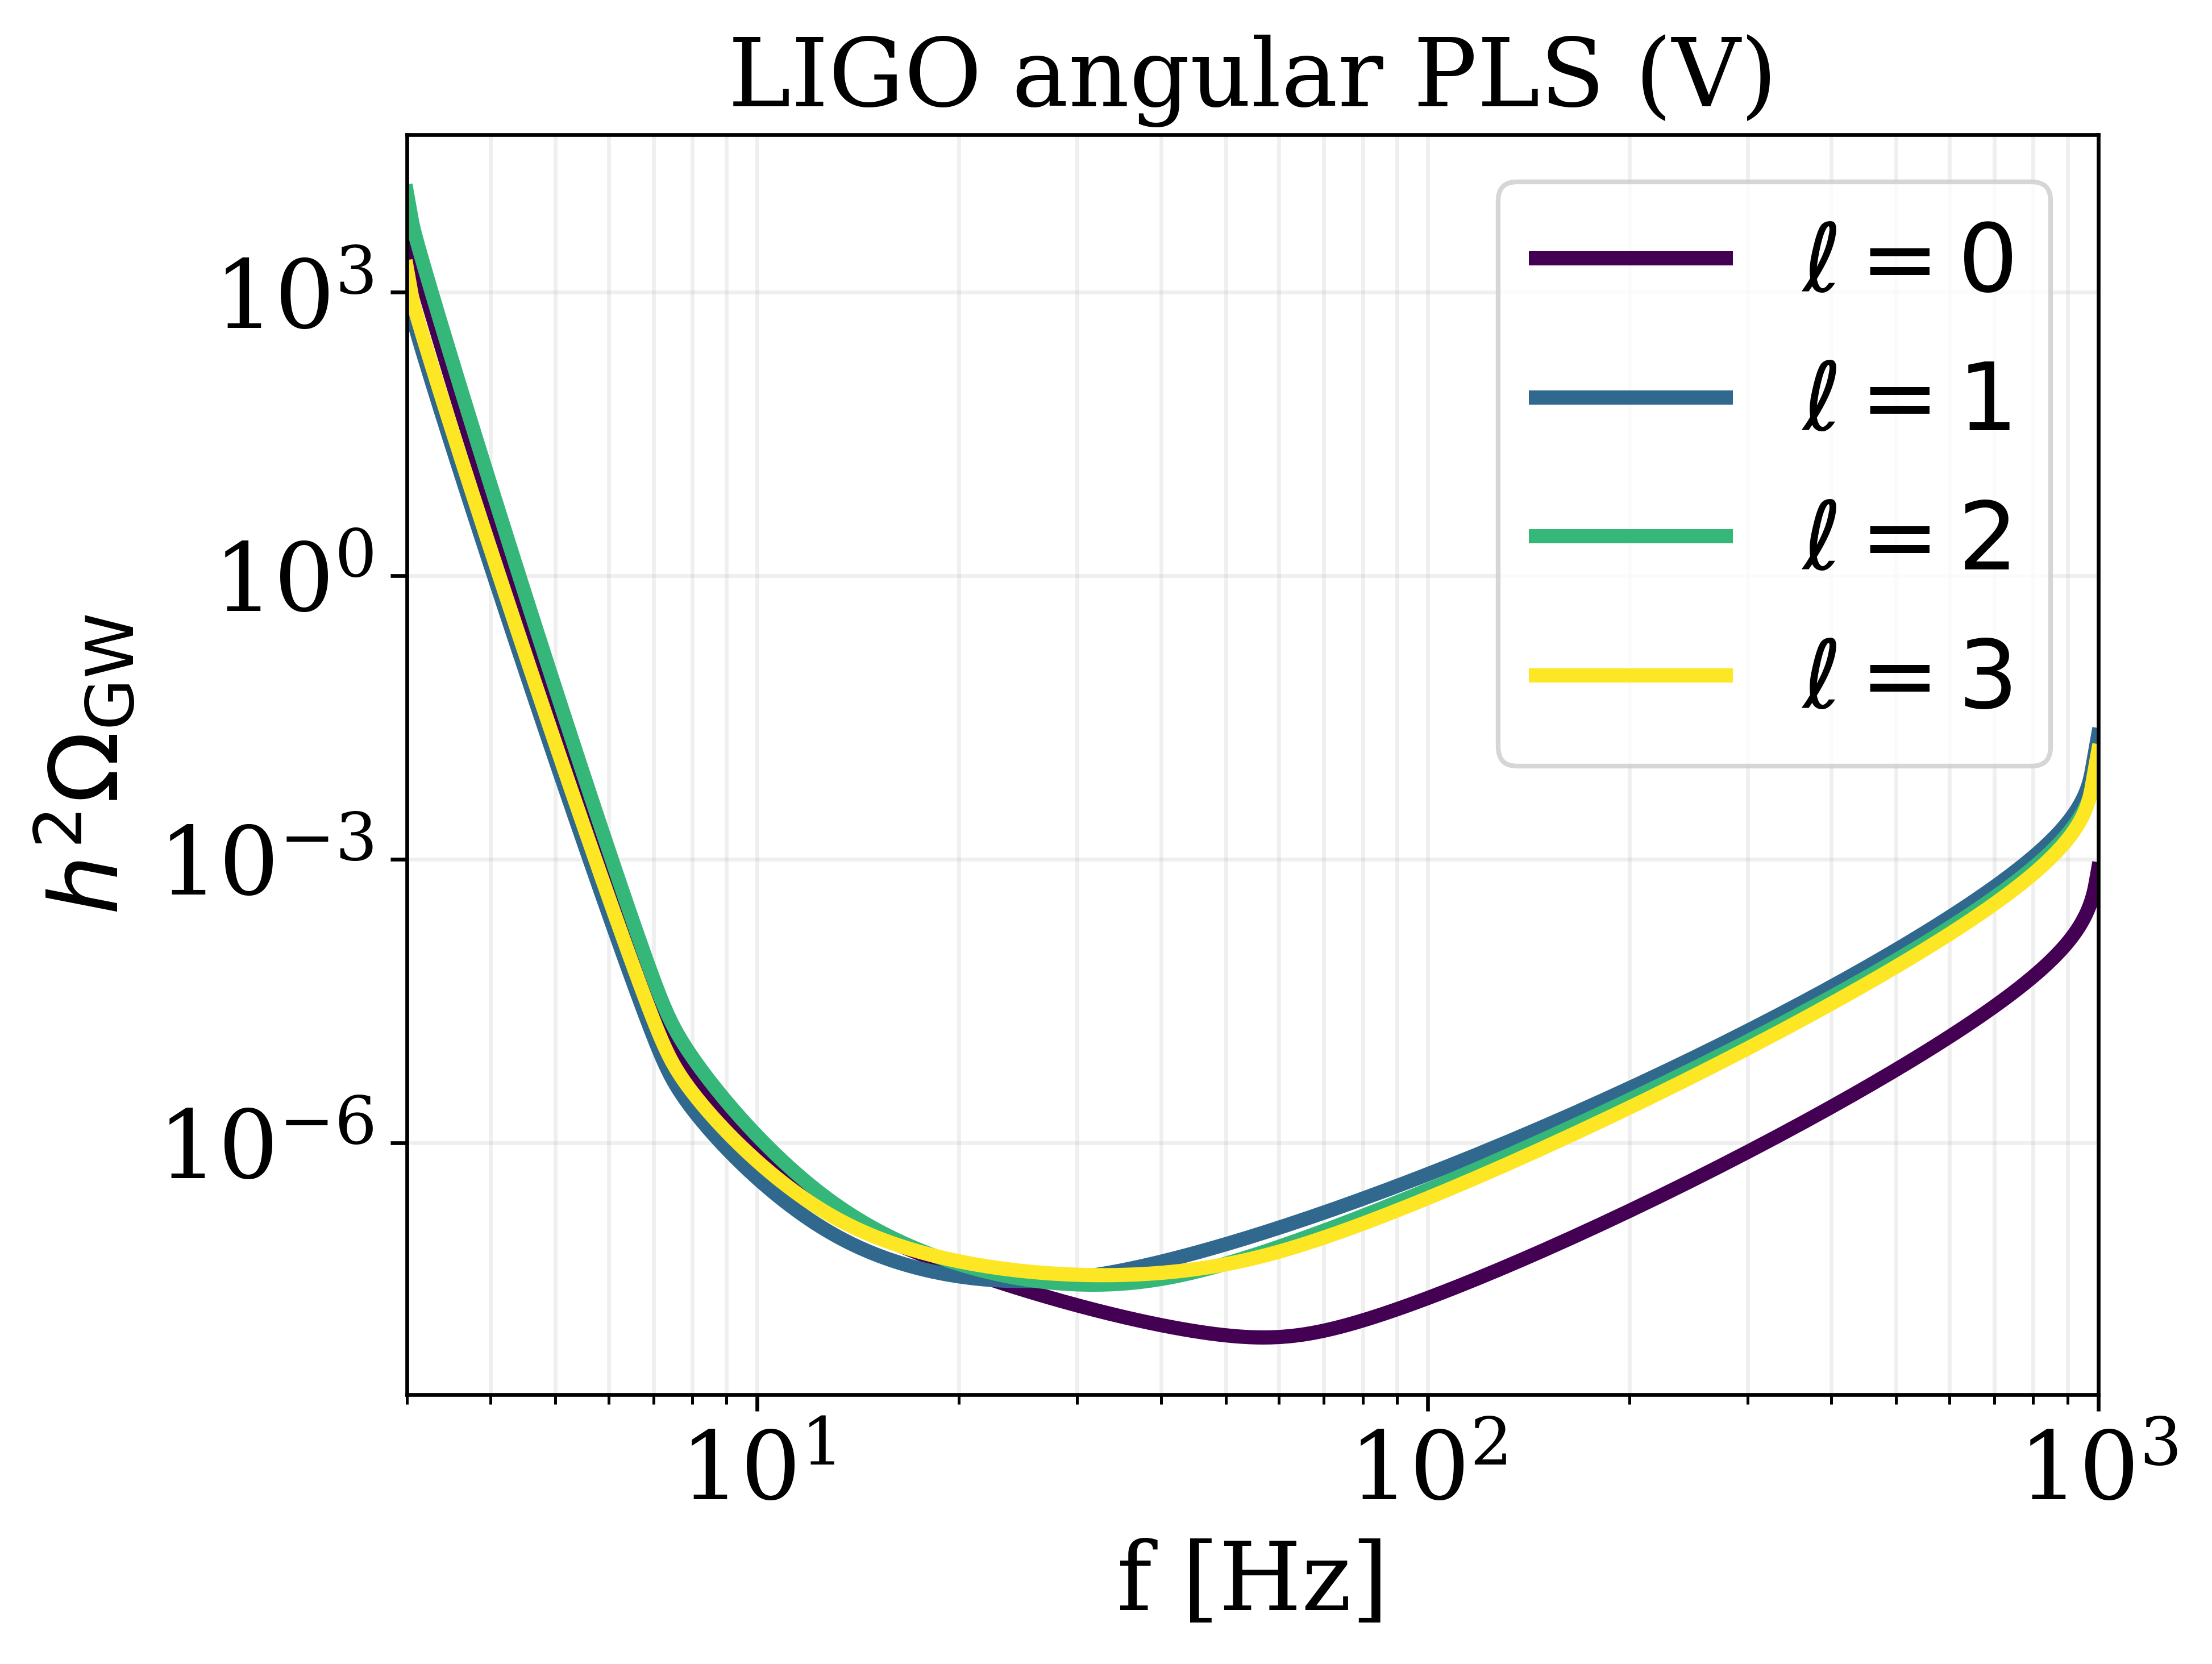

In [128]:
# V

fref = 25
snr = 1
Tobs = 1

pls0_V = Sensitivity_ell.APLS_ell('LIGO H', 'LIGO L', 0, f, 'V', 0, fref, snr, Tobs, 1)
pls1_V = Sensitivity_ell.APLS_ell('LIGO H', 'LIGO L', 1, f, 'V', 0, fref, snr, Tobs, 1e-3)
pls2_V = Sensitivity_ell.APLS_ell('LIGO H', 'LIGO L', 2, f, 'V', 0, fref, snr, Tobs, 1e-3)
pls3_V = Sensitivity_ell.APLS_ell('LIGO H', 'LIGO L', 3, f, 'V', 0, fref, snr, Tobs, 1e-3)
                                     
idx_min_0_V = np.argmin(pls0_V)
idx_min_1_V = np.argmin(pls1_V)
idx_min_2_V = np.argmin(pls2_V)
idx_min_3_V = np.argmin(pls3_V)

print("Min pls_0_V:", pls0_V[idx_min_0_V], "f min:", f[idx_min_0_V])
print("Min pls_1_V:", pls1_V[idx_min_1_V], "f min:", f[idx_min_1_V])
print("Min pls_2_V:", pls2_V[idx_min_2_V], "f min:", f[idx_min_2_V])
print("Min pls_3_V:", pls3_V[idx_min_3_V], "f min:", f[idx_min_3_V])

colors = plt.cm.viridis(np.linspace(0, 1, 4))
plt.plot(f, pls0_V, label=r'$\ell=0$', color=colors[0], rasterized=True)
plt.plot(f, pls1_V, label=r'$\ell=1$', color=colors[1], rasterized=True)
plt.plot(f, pls2_V, label=r'$\ell=2$', color=colors[2], rasterized=True)
plt.plot(f, pls3_V, label=r'$\ell=3$', color=colors[3], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{ \rm GW}$')
plt.title('LIGO angular PLS (V)')
plt.grid(alpha=0.2, which='both')
plt.xlim(3, 1000)
plt.legend()

* LIGO + Virgo sensitivity to X polarization

Min pls_t: 5.655491394144522e-09 f min: 40.83454471791768
Min pls_v: 9.590876508560122e-09 f min: 37.86146931185755


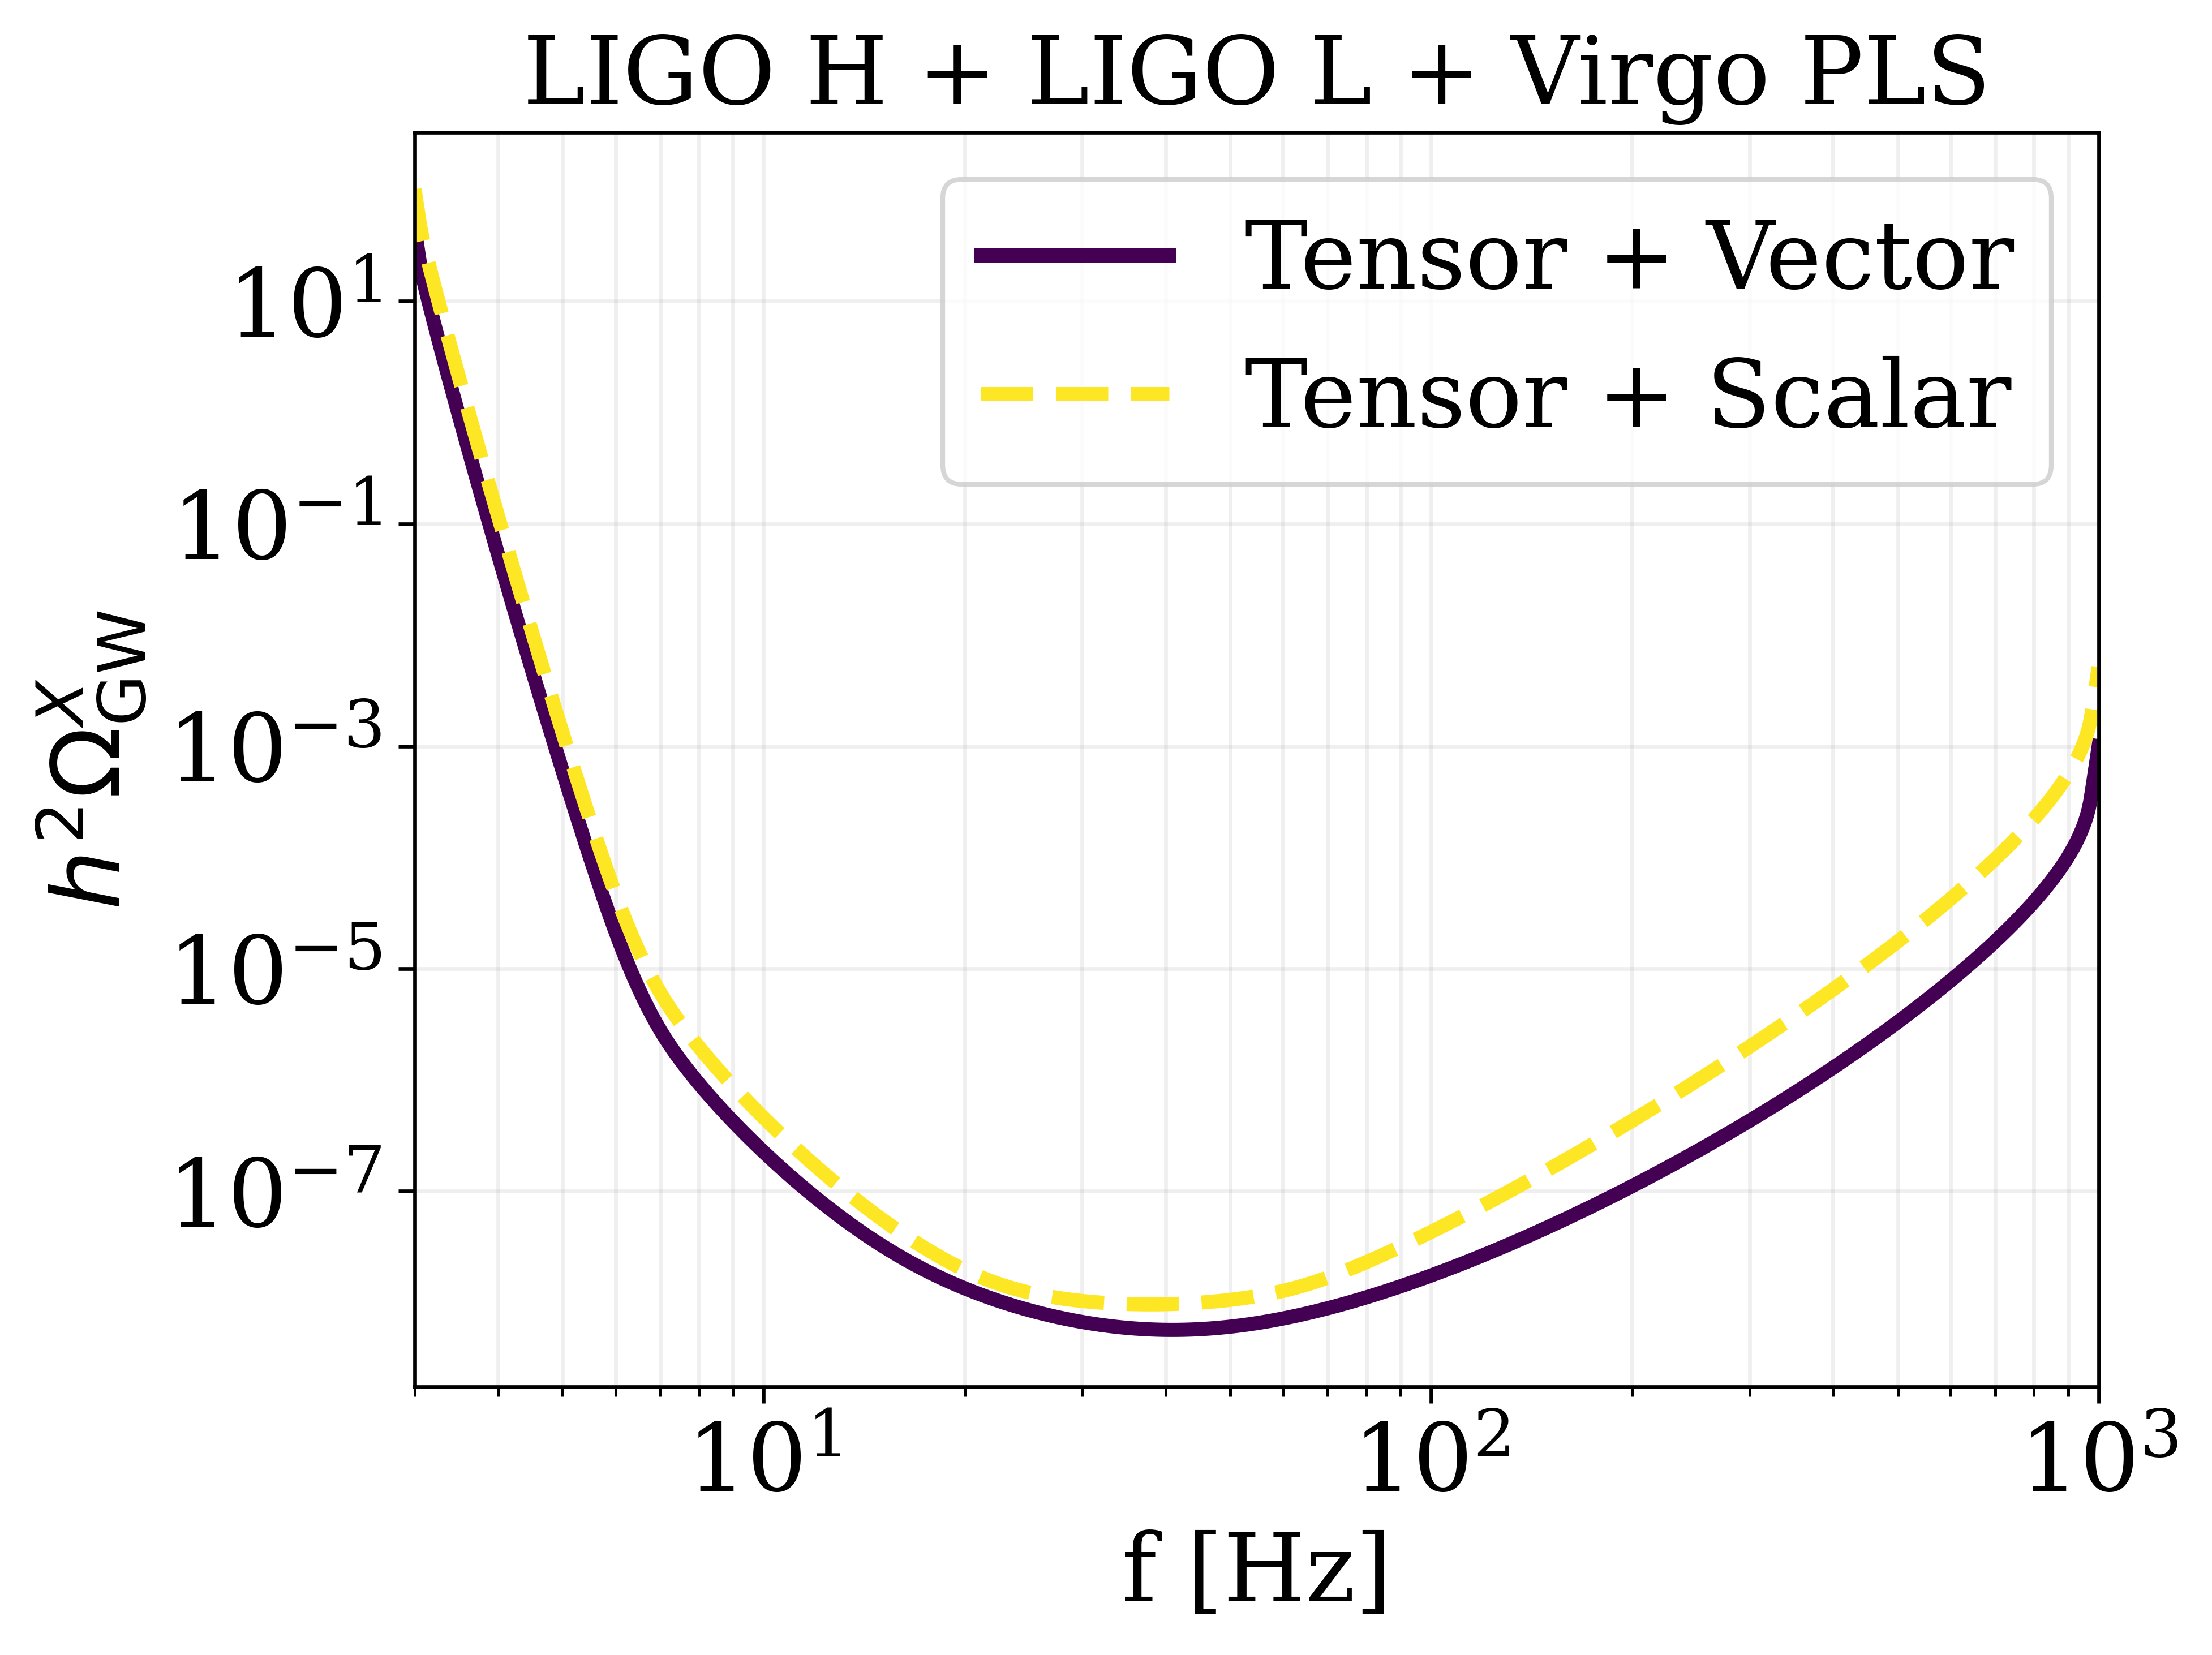

In [129]:
f = np.logspace(np.log10(3), np.log10(1000), 1000)

fref = 25
snr = 5
Tobs = 5

pls_tv_LIGOVirgo = pls.PLS_2pol('LIGO H', 'LIGO L', 'Virgo', f, fref, 'v', snr, Tobs, 0, None)
pls_ts_LIGOVirgo = pls.PLS_2pol('LIGO H', 'LIGO L', 'Virgo', f, fref, 's', snr, Tobs, 0, None)

idx_min_tv = np.argmin(pls_tv_LIGOVirgo)
idx_min_ts = np.argmin(pls_ts_LIGOVirgo)


print("Min pls_t:", pls_tv_LIGOVirgo[idx_min_tv], "f min:", f[idx_min_tv])
print("Min pls_v:", pls_ts_LIGOVirgo[idx_min_ts], "f min:", f[idx_min_ts])

colors = plt.cm.viridis(np.linspace(0, 1, 2))
plt.plot(f, pls_tv_LIGOVirgo, label='Tensor + Vector', color=colors[0], rasterized=True)
plt.plot(f, pls_ts_LIGOVirgo, label='Tensor + Scalar', linestyle='--', color=colors[1], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{ \rm GW}^X$')
plt.title(r'LIGO H + LIGO L + Virgo PLS')
plt.grid(alpha=0.2, which='both')
plt.xlim(3, 1000)
plt.legend()

* LIGO + Virgo sensitivity to M polarization (M = t, v, s)

Min pls_t: 5.168883452321524e-09 f min: 41.3122193123642
Min pls_v: 1.1670540972872309e-08 f min: 41.79548165169085
Min pls_s: 1.2963457268541157e-08 f min: 30.355130632844595


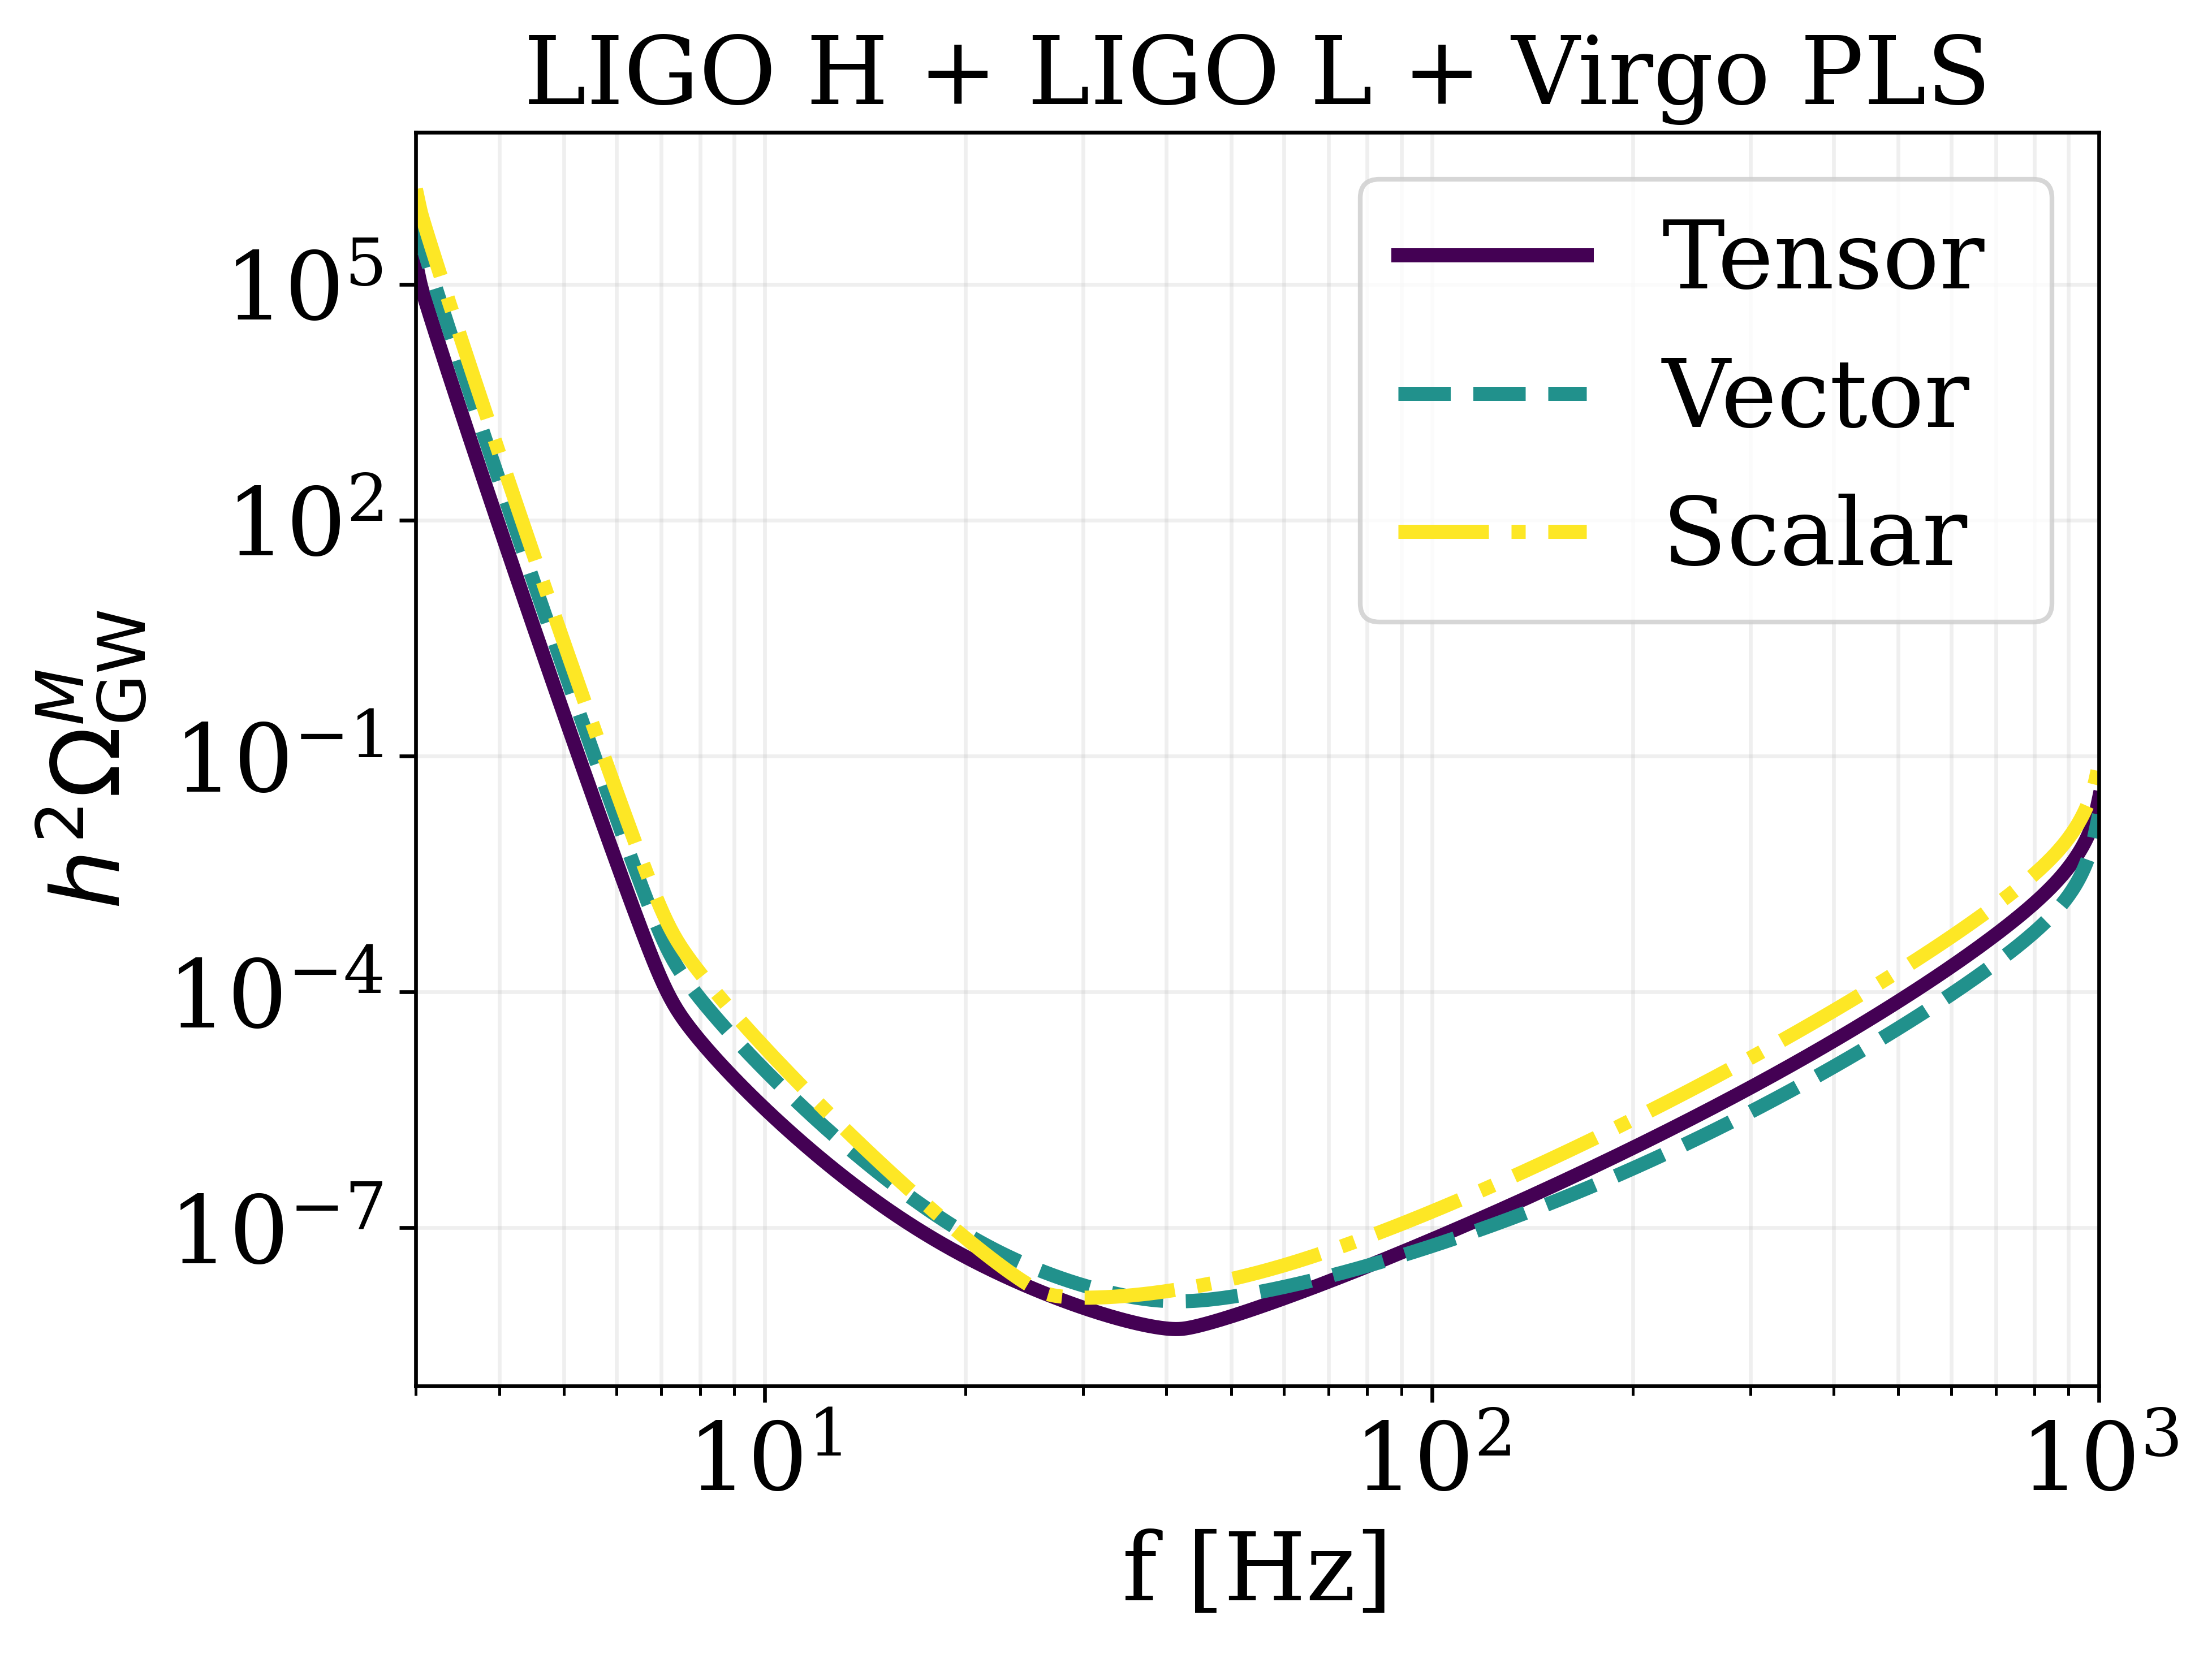

In [130]:
pls_t_LIGOVirgo = pls.PLS_3pol('LIGO H', 'LIGO L', 'Virgo', f, fref, 't', snr, Tobs, 0, None)
pls_v_LIGOVirgo = pls.PLS_3pol('LIGO H', 'LIGO L', 'Virgo', f, fref, 'v', snr, Tobs, 0, None)
pls_s_LIGOVirgo = pls.PLS_3pol('LIGO H', 'LIGO L', 'Virgo', f, fref, 's', snr, Tobs, 0, None)

idx_min_t = np.argmin(pls_t_LIGOVirgo)
idx_min_v = np.argmin(pls_v_LIGOVirgo)
idx_min_s = np.argmin(pls_s_LIGOVirgo)


print("Min pls_t:", pls_t_LIGOVirgo[idx_min_t], "f min:", f[idx_min_t])
print("Min pls_v:", pls_v_LIGOVirgo[idx_min_v], "f min:", f[idx_min_v])
print("Min pls_s:", pls_s_LIGOVirgo[idx_min_s], "f min:", f[idx_min_s])

colors = plt.cm.viridis(np.linspace(0, 1, 3))
plt.plot(f, pls_t_LIGOVirgo, label='Tensor ', color=colors[0], rasterized=True)
plt.plot(f, pls_v_LIGOVirgo, label='Vector', linestyle='--', color=colors[1], rasterized=True)
plt.plot(f, pls_s_LIGOVirgo, label='Scalar', linestyle='-.', color=colors[2], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{ \rm GW}^M$')
plt.title(r'LIGO H + LIGO L + Virgo PLS')
plt.xlim(3, 1000)
plt.grid(alpha=0.2, which='both')
plt.legend()